In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
df = pd.read_csv('data/loan_data_core.csv')
df.drop(['id', 'member_id', 'url', 'emp_title'], axis=1, inplace=True)

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# converting columns where % charater is in every entry into a number

df['int_rate'] = df.int_rate.apply(lambda interest: interest[:len(interest)-1])
df['int_rate'] = pd.to_numeric(df['int_rate'])

df['revol_util'].fillna('0%', inplace=True)
df['revol_util'] = df['revol_util'].apply(
    lambda interest: interest[:len(interest)-1])
df['revol_util'] = pd.to_numeric(df['revol_util'])

In [5]:
grades = sorted(set(df.grade))

In [44]:
def percentage(feature):
    """Prints out number of samples, percent of total per loan grade A-G, t-stat, and p-value"""

    all_loans = df[feature].value_counts().sort_index()
    all_features = set(all_loans.index)

    
    for letter in grades:
        for features in all_features: 
            grade_loan = df[feature].loc[df.grade == letter].value_counts().sort_index() / 
                        len(df.loc[df[feature]==features]) * 100
        
        all_loans = pd.concat([all_loans, grade_loan], axis=1)
        
    all_loans.columns = ['n_samples'] + grades

    all_loans.reset_index(inplace=True)
    
#    n_percent.fillna(0, inplace=True)
    
    return(all_loans)


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [38]:
def object_graph(feature):
    """Makes a bar graph of a column complete with all it's features, each bar with show the its makeup as a percentage total
    and prints out the features with sample size and fail rate"""

    feature_interest = df[[feature]].dropna()

    x = sorted(list(set(feature_interest[feature])))
    y = [len(feature_interest.loc[feature_interest[feature] == i])/2507640*100 for i in x]
    
    plt.bar(x, y)

    plt.title(feature.upper())
    plt.ylabel('%')
    plt.xlabel(feature)
    plt.xticks(rotation=90)

    plt.show()
    print(percentage(feature))


def numeric_graph(feature):
    """Makes a graph of a numeric column by turn the data into a ECDF"""

    feature_interest = df[[feature, 'grade']].dropna()

    # A - G
    #lines for each loan grade is generated
    for letter in grades:
        grade_x, grade_y = ecdf(
            feature_interest.loc[feature_interest.grade == letter][feature])
        plt.plot(grade_x, grade_y, marker='.', linestyle='none', label=letter)

    # population
    pop_x, pop_y = ecdf(feature_interest[feature])
    plt.plot(pop_x, pop_y, marker='.', linestyle='none',
             color='black', label='All Grades')

    plt.title(feature.upper())
    plt.axis([np.percentile(pop_x, 2.5), np.percentile(pop_x, 97.5), 0, 1])
    plt.xlabel('Amounts')
    plt.ylabel('% cumulative')
    plt.legend(loc='best')

    plt.show()
    
    
    #creates data frame of loan_grade numeric description for all grades and the pop using the .describe() method
    
    df_description = feature_interest[feature].describe()
    
    for letter in grades:
        df_letter = feature_interest.loc[feature_interest.grade == letter][feature].describe()
        df_description = pd.concat([df_description,df_letter],axis =1)
        
    df_description.columns = ['All loans'] + grades
    print(df_description)

In [8]:
numeric = []

for column in df:
    if ((df[column].dtypes == 'float64') | (df[column].dtypes == 'int64')):
        numeric.append(column)

# removed dates and useless stats (columns that contained only 1 value)

numeric.remove('next_pymnt_d')
numeric.remove('out_prncp')
numeric.remove('out_prncp_inv')
numeric.remove('collections_12_mths_ex_med')
numeric.remove('policy_code')
numeric.remove('acc_now_delinq')
numeric.remove('chargeoff_within_12_mths')
numeric.remove('delinq_amnt')
numeric.remove('num_tl_120dpd_2m')
numeric.remove('num_tl_30dpd')
numeric.remove('deferral_term')
numeric.remove('hardship_length')

objects = []
for column in df:
    if (df[column].dtypes == 'object'):
        objects.append(column)

# removed dates and useless stats (columns where the feature size was very small)
objects.remove('grade')
objects.remove('sub_grade')
objects.remove('last_pymnt_d')
objects.remove('last_credit_pull_d')
objects.remove('desc')
objects.remove('title')
objects.remove('zip_code')
objects.remove('addr_state')
objects.remove('earliest_cr_line')
objects.remove('sec_app_earliest_cr_line')
objects.remove('hardship_reason')
objects.remove('hardship_start_date')
objects.remove('hardship_end_date')
objects.remove('payment_plan_start_date')
objects.remove('debt_settlement_flag_date')
objects.remove('settlement_date')
objects.remove('hardship_flag')
objects.remove('hardship_type')
objects.remove('issue_d')
objects.remove('debt_settlement_flag')

In [31]:
df['year'] = df.issue_d.apply(lambda dates: dates[-2:])
df['month'] = df.issue_d.apply(lambda dates: dates[:3])

In [53]:
all_features

{'07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18'}

In [57]:
for thing in sorted(all_features):
    print(thing)

07
08
09
10
11
12
13
14
15
16
17
18


In [61]:
df['year'].loc[df.grade == 'A'].value_counts().sort_index()

07       114
08       590
09      2356
10      5602
11     11508
12     21802
13     35358
14     71700
15    143566
16     85346
17     36702
18     19470
Name: year, dtype: int64

In [63]:
all_loans = df['year'].value_counts().sort_index()


In [65]:
type(all_loans[0])

numpy.int64

In [62]:
all_loans = df['year'].value_counts().sort_index()
all_features = set(all_loans.index)

    
for letter in grades:
    for features in sorted(all_features):
        grade_loan = df['year'].loc[df.grade == letter].value_counts().sort_index() / all_loans[0] * 100
        
    all_loans = pd.concat([all_loans, grade_loan], axis=1)
        
all_loans.columns = ['n_samples'] + grades

all_loans.reset_index(inplace=True)
    
all_loans

TypeError: '<' not supported between instances of 'str' and 'int'

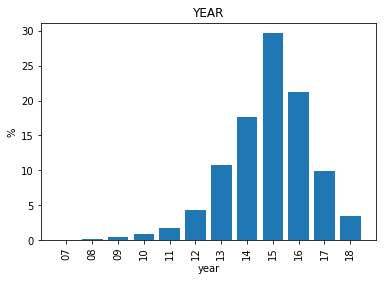

   index  n_samples          A          B          C          D          E  \
0     07        502   0.021399   0.022901   0.028157   0.013891   0.005256   
1     08       3124   0.110750   0.190340   0.164435   0.083344   0.028157   
2     09       9432   0.442249   0.512453   0.447880   0.246653   0.088600   
3     10      23072   1.051561   1.327872   0.924668   0.605558   0.298086   
4     11      43442   2.160186   2.464654   1.479919   1.049684   0.652861   
5     12     106734   4.092489   6.947959   4.458152   2.749225   1.195723   
6     13     269556   6.637108  16.561423  14.312262   7.717201   3.399833   
7     14     441594  13.458925  22.391371  23.146348  14.502226   6.717074   
8     15     744668  26.949010  39.863196  38.877334  19.810712  10.542261   
9     16     532732  16.020438  29.943011  29.872056  14.299498   6.590931   
10    17     246888   6.889393  12.733232  15.648394   6.388203   2.929803   
11    18      85896   3.654746   4.429244   4.203615   2.747348 

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [45]:
object_graph('year')

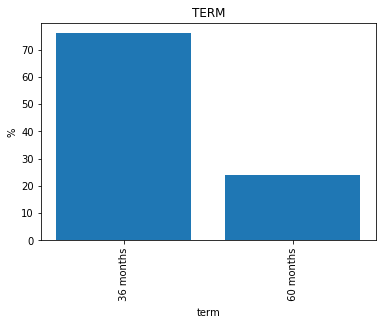

        index  n_samples          A           B          C          D  \
0   36 months    1904562  70.073854  106.931442  85.675153  39.087150   
1   60 months     603078   1.909206   14.430637  32.308590  22.936337   

           E         F         G  
0  11.251613  2.322751  0.464948  
1  18.175095  7.844093  2.396042  


In [66]:
object_graph('term')

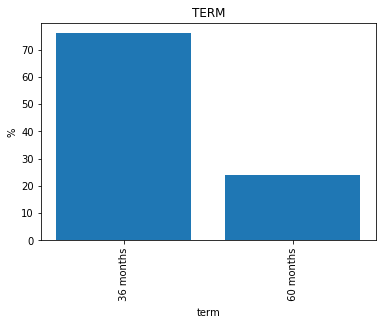

        index  n_samples          A          B          C          D  \
0   36 months    1904562  97.347701  88.109435  72.616066  63.019917   
1   60 months     603078   2.652299  11.890565  27.383934  36.980083   

           E          F          G  
0  38.236056  22.846332  16.251304  
1  61.763944  77.153668  83.748696  


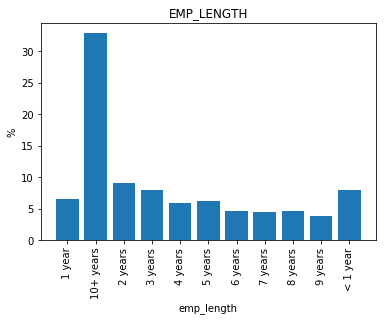

        index  n_samples          A          B          C          D  \
0      1 year     164812   6.309403   6.562300   6.727156   6.687876   
1   10+ years     824588  33.932561  32.921078  32.514820  32.134207   
2     2 years     226758   8.928070   9.074091   9.089938   9.055474   
3     3 years     200576   7.966571   8.015762   8.035877   7.968988   
4     4 years     150192   5.950971   5.962498   5.970762   6.119503   
5     5 years     157126   6.268860   6.290955   6.245942   6.244085   
6     6 years     117608   4.612613   4.719992   4.683683   4.705253   
7     7 years     112658   4.356459   4.498106   4.472028   4.586553   
8     8 years     115110   4.654538   4.585822   4.550731   4.491378   
9     9 years      95802   3.771360   3.840647   3.812046   3.779709   
10   < 1 year     199366   8.013103   7.872028   8.069888   7.946531   

            E          F          G  
0    6.465464   6.347653   6.630347  
1   32.922363  33.519262  33.615394  
2    9.021446   8.944

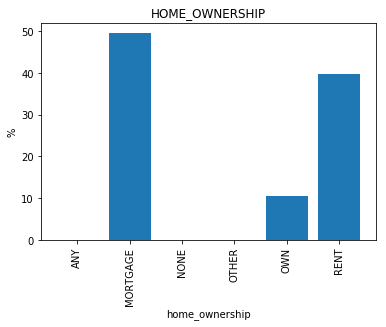

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


      index  n_samples          A          B          C          D          E  \
0       ANY        518   0.018889   0.024047   0.018270   0.021388   0.018032   
1  MORTGAGE    1242936  57.693141  50.039896  47.431043  45.510493  46.609491   
2      NONE         96   0.002764   0.004099   0.003373   0.004812   0.001127   
3     OTHER        288   0.011518   0.012843   0.010119   0.011228   0.011270   
4       OWN     266898  10.619330  10.413331  10.652759  10.909237  10.849402   
5      RENT     996904  31.654358  39.505785  41.884436  43.542842  42.510678   

           F          G  
0   0.016309   0.046366  
1  45.555664  45.601020  
2   0.013048   0.011592  
3   0.016309        NaN  
4  10.904524  11.811754  
5  43.494145  42.529269  


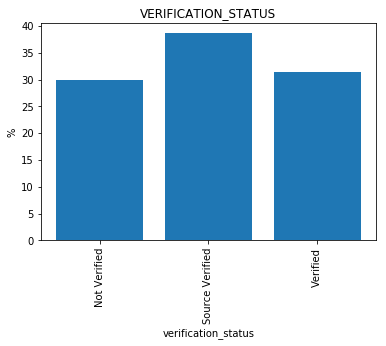

             index  n_samples          A          B          C          D  \
0     Not Verified     749220  45.698595  35.309356  25.938606  20.993985   
1  Source Verified     969034  35.045633  38.883849  40.153809  39.161609   
2         Verified     789386  19.255772  25.806795  33.907586  39.844406   

           E          F          G  
0  12.906134   8.833219   5.760983  
1  40.839372  35.707995  33.267648  
2  46.254494  55.458786  60.971369  


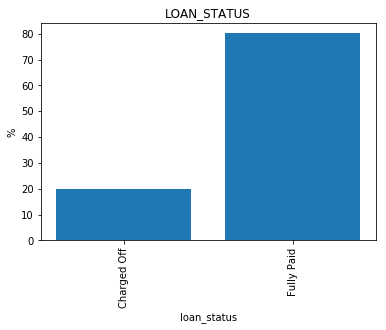

         index  n_samples         A          B          C          D  \
0  Charged Off     498120   5.98921  13.260137  22.216507  30.109344   
1   Fully Paid    2009520  94.01079  86.739863  77.783493  69.890656   

           E          F          G  
0  38.392706  45.046808  49.913064  
1  61.607294  54.953192  50.086936  


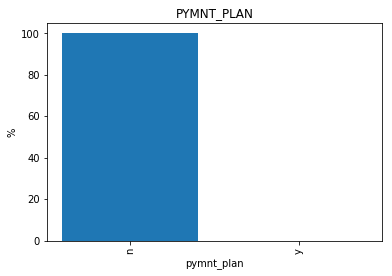

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


  index  n_samples      A      B          C      D      E      F      G
0     n    2507638  100.0  100.0  99.999719  100.0  100.0  100.0  100.0
1     y          2    NaN    NaN   0.000281    NaN    NaN    NaN    NaN


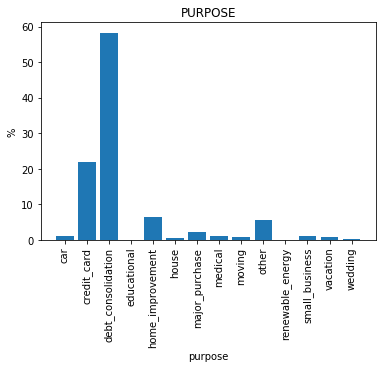

                 index  n_samples          A          B          C          D  \
0                  car      27082   1.631369   1.142767   0.949217   0.843737   
1          credit_card     551450  32.041353  26.593780  19.334002  14.332309   
2   debt_consolidation    1461114  49.161741  56.415014  61.044729  62.873947   
3          educational        652   0.037317   0.028146   0.025860   0.016575   
4     home_improvement     161660   7.919118   6.320740   6.150655   5.810453   
5                house      12736   0.370410   0.329550   0.435678   0.649646   
6       major_purchase      54082   2.832896   2.102177   1.982758   1.962839   
7              medical      28352   0.805779   0.948480   1.253348   1.436172   
8               moving      17616   0.338621   0.458254   0.759767   1.124449   
9                other     141124   3.527184   4.258185   6.061833   7.928887   
10    renewable_energy       1744   0.043307   0.045634   0.065773   0.105868   
11      small_business      

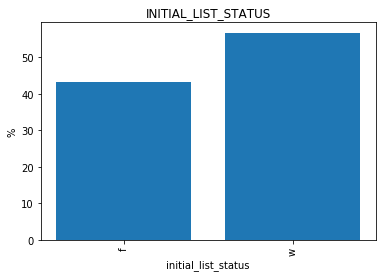

  index  n_samples          A          B          C         D          E  \
0     f    1084118  34.546686  43.297518  41.157274  50.38952  52.044899   
1     w    1423522  65.453314  56.702482  58.842726  49.61048  47.955101   

           F          G  
0  55.938285  53.657123  
1  44.061715  46.342877  


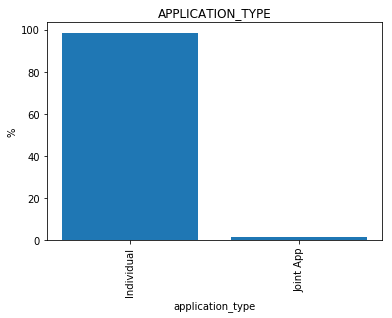

        index  n_samples          A          B          C          D  \
0  Individual    2471086  98.965709  98.772797  98.303946  98.243016   
1   Joint App      36554   1.034291   1.227203   1.696054   1.756984   

           E          F          G  
0  98.333202  98.342956  97.287585  
1   1.666798   1.657044   2.712415  


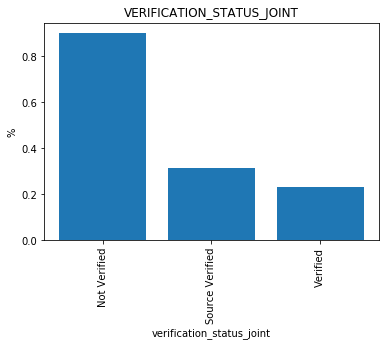

             index  n_samples         A         B         C         D  \
0     Not Verified      22572  0.681849  0.800101  1.050126  1.024462   
1  Source Verified       7894  0.186126  0.257683  0.362035  0.417057   
2         Verified       5834  0.146505  0.160676  0.274899  0.309050   

          E         F         G  
0  0.975962  0.877451  1.054828  
1  0.379791  0.407737  0.811406  
2  0.302030  0.371856  0.846181  


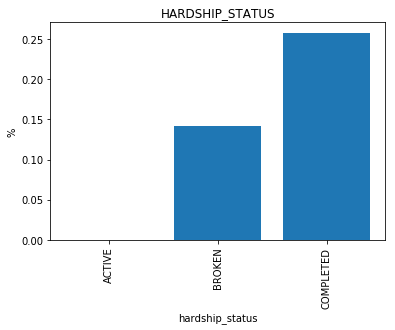

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, 

       index  n_samples         A         B         C        D         E  \
0     ACTIVE          2       NaN       NaN  0.000281      NaN       NaN   
1     BROKEN       3564  0.025339  0.095640  0.169493  0.20639  0.272728   
2  COMPLETED       6462  0.092142  0.197839  0.311440  0.35931  0.405712   

          F         G  
0       NaN       NaN  
1  0.358809  0.417295  
2  0.446880  0.347745  


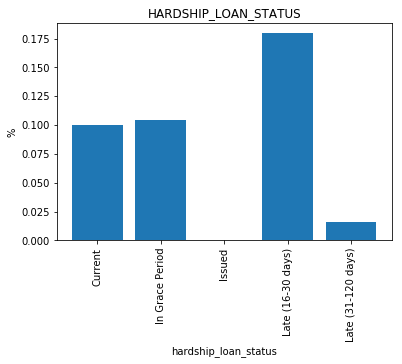

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, 

                index  n_samples         A         B         C         D  \
0             Current       2510  0.043307  0.083890  0.126768  0.112819   
1     In Grace Period       2610  0.027182  0.077879  0.120303  0.148643   
2              Issued         10  0.000461  0.000547  0.000562       NaN   
3   Late (16-30 days)       4502  0.045149  0.121600  0.214185  0.275364   
4  Late (31-120 days)        396  0.001382  0.009564  0.019395  0.028873   

          E         F         G  
0  0.141999  0.156571  0.208647  
1  0.184824  0.241380  0.197056  
2       NaN       NaN       NaN  
3  0.317807  0.388166  0.347745  
4  0.033809  0.019571  0.011592  


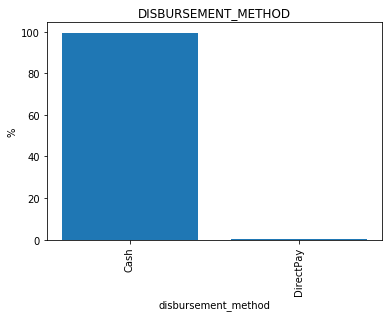

       index  n_samples          A          B          C          D  \
0       Cash    2498216  99.456364  99.766911  99.739436  99.603262   
1  DirectPay       9424   0.543636   0.233089   0.260564   0.396738   

           E          F          G  
0  99.320433  99.070359  98.585835  
1   0.679567   0.929641   1.414165  


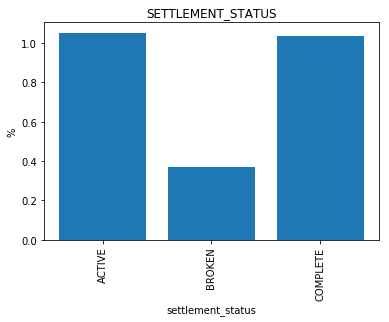

      index  n_samples         A         B         C         D         E  \
0    ACTIVE      26374  0.348756  0.729873  1.156375  1.591231  2.073637   
1    BROKEN       9216  0.095367  0.224072  0.398575  0.569443  0.801280   
2  COMPLETE      25894  0.478215  0.823054  1.112807  1.414249  1.738925   

          F         G  
0  2.061519  2.283528  
1  0.936165  1.159152  
2  1.917996  1.877825  


In [9]:
for thing in objects:
    object_graph(thing)

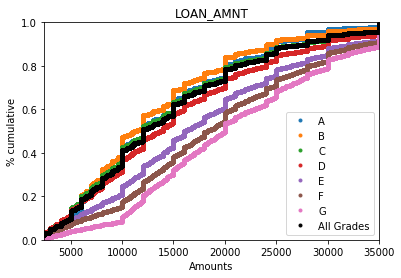

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.441101e+04   13899.063610   13208.107098   14152.310360   
std    8.663254e+03    7959.555843    8007.276275    8747.295966   
min    5.000000e+02     500.000000     500.000000     500.000000   
25%    8.000000e+03    8000.000000    7000.000000    7500.000000   
50%    1.200000e+04   12000.000000   11200.000000   12000.000000   
75%    2.000000e+04   20000.000000   18000.000000   20000.000000   
max    4.000000e+04   40000.000000   40000.000000   40000.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean    15259.320545   17661.546719  19075.945950  20585.722151  
std      9191.564497    9404.713057   9289.029496   8958.080798  
min      1000.000000    1000.000000   1000.000000   1000.000000  
25%      8000.000000   10200.000000  12000.000000  13381.

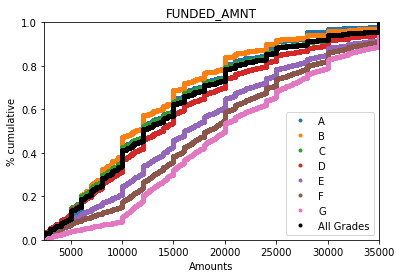

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.440198e+04   13888.533657   13199.385442   14146.947792   
std    8.658998e+03    7960.606379    8001.939319    8744.396347   
min    5.000000e+02     500.000000     500.000000     500.000000   
25%    8.000000e+03    8000.000000    7000.000000    7500.000000   
50%    1.200000e+04   12000.000000   11200.000000   12000.000000   
75%    2.000000e+04   20000.000000   18000.000000   20000.000000   
max    4.000000e+04   40000.000000   40000.000000   40000.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean    15253.172437   17641.379476  19047.993117  20569.511418  
std      9188.566711    9394.489797   9278.412827   8951.106857  
min      1000.000000    1000.000000   1000.000000   1000.000000  
25%      8000.000000   10200.000000  12000.000000  13381.

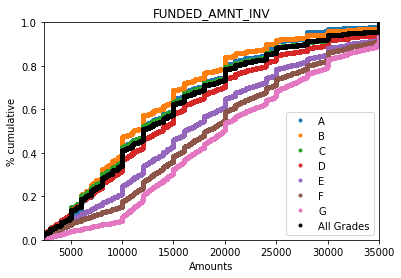

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.437834e+04   13871.817566   13174.257029   14126.192293   
std    8.661694e+03    7966.278732    8002.280529    8749.392690   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    7.950000e+03    8000.000000    7000.000000    7375.000000   
50%    1.200000e+04   12000.000000   11200.000000   12000.000000   
75%    2.000000e+04   19975.000000   18000.000000   20000.000000   
max    4.000000e+04   40000.000000   40000.000000   40000.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean    15227.507053   17607.713380  19008.023596  20520.563441  
std      9193.404617    9396.353802   9278.226748   8955.499728  
min         0.000000       0.000000      0.002284   1000.000000  
25%      8000.000000   10150.000000  12000.000000  13300.

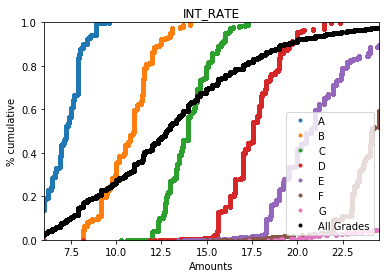

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.324848e+01       7.130334      10.696705      14.014919   
std    4.733669e+00       1.000604       1.362816       1.230516   
min    5.310000e+00       5.310000       6.000000       6.000000   
25%    9.750000e+00       6.490000       9.710000      12.990000   
50%    1.279000e+01       7.260000      10.990000      13.990000   
75%    1.599000e+01       7.890000      11.530000      14.990000   
max    3.099000e+01       9.630000      14.090000      17.270000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean       17.648655      21.007749     24.795645     27.586302  
std         1.481720       2.283862      2.488196      2.522682  
min         6.000000       6.000000      6.000000      6.000000  
25%        16.550000      19.190000     23.280000     25.

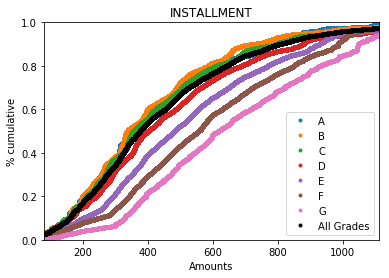

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   4.380954e+02     424.163005     403.753499     425.121793   
std    2.601662e+02     243.696618     238.979366     258.385369   
min    4.930000e+00      14.770000      16.080000      16.470000   
25%    2.495400e+02     240.920000     229.140000     241.120000   
50%    3.754900e+02     370.090000     336.900000     355.350000   
75%    5.799500e+02     594.520000     521.030000     550.140000   
max    1.719830e+03    1268.460000    1347.380000    1406.680000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean      469.228244     528.360588    583.827284    659.193593  
std       280.667118     280.083504    279.488685    289.930206  
min        14.010000       4.930000     27.820000     35.110000  
25%       267.550000     318.730000    372.040000    429.

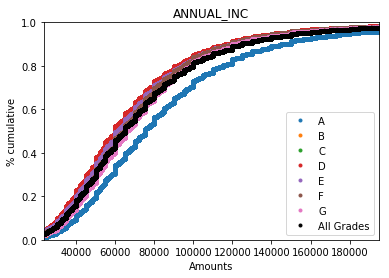

          All loans             A             B             C             D  \
count  2.507640e+06  4.341140e+05  7.319080e+05  7.115340e+05  3.740500e+05   
mean   7.609940e+04  8.888008e+04  7.627483e+04  7.263282e+04  6.992245e+04   
std    6.969604e+04  8.629585e+04  6.726288e+04  6.826813e+04  6.172512e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.594575e+04  5.400000e+04  4.680924e+04  4.500000e+04  4.200000e+04   
50%    6.500000e+04  7.500000e+04  6.500000e+04  6.100000e+04  6.000000e+04   
75%    9.000000e+04  1.050000e+05  9.000000e+04  8.700000e+04  8.500000e+04   
max    1.099920e+07  9.550000e+06  8.700000e+06  9.522972e+06  1.099920e+07   

                  E             F              G  
count  1.774660e+05  6.131400e+04   17254.000000  
mean   7.203033e+04  7.313446e+04   76349.151703  
std    5.866061e+04  4.819737e+04   51172.962802  
min    0.000000e+00  0.000000e+00       0.000000  
25%    4.500000e+04  4.560000e+04

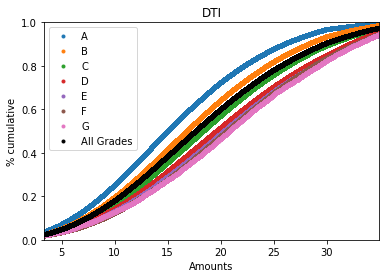

          All loans              A              B              C  \
count  2.507172e+06  434086.000000  731790.000000  711350.000000   
mean   1.822313e+01      15.590477      17.349634      18.839853   
std    1.051788e+01       8.440918       9.925671      10.498695   
min   -1.000000e+00       0.000000      -1.000000      -1.000000   
25%    1.181000e+01       9.930000      11.310000      12.450000   
50%    1.761000e+01      14.990000      16.790000      18.330000   
75%    2.401000e+01      20.700000      22.840000      24.690000   
max    9.990000e+02     999.000000     999.000000     999.000000   

                   D              E             F             G  
count  373974.000000  177432.000000  61296.000000  17244.000000  
mean       20.073369      20.682708     20.851927     21.344466  
std        11.930254      11.530297     11.278027     16.211796  
min         0.000000       0.000000      0.000000      0.000000  
25%        13.280000      13.900000     14.240000     14.

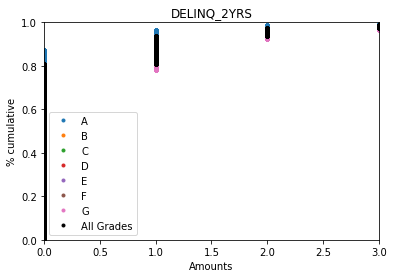

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   3.190338e-01       0.192291       0.324456       0.352380   
std    8.786840e-01       0.636781       0.879464       0.934207   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       0.000000   
max    3.900000e+01      20.000000      24.000000      30.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean        0.365224       0.354829      0.360831      0.384722  
std         0.955073       0.927041      0.920546      1.031027  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

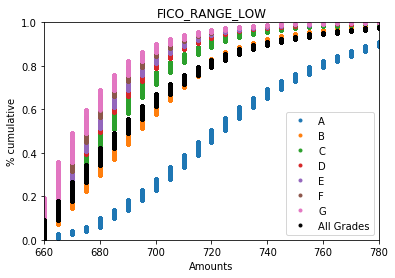

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   6.958590e+02     727.001801     696.895593     687.791982   
std    3.161433e+01      36.666304      29.282697      24.590852   
min    6.250000e+02     660.000000     660.000000     660.000000   
25%    6.700000e+02     700.000000     675.000000     670.000000   
50%    6.900000e+02     720.000000     690.000000     680.000000   
75%    7.100000e+02     750.000000     710.000000     700.000000   
max    8.450000e+02     845.000000     845.000000     845.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean      683.101885     681.911746    679.759761    678.225339  
std        21.610382      20.614452     19.647710     19.046505  
min       660.000000     630.000000    625.000000    660.000000  
25%       665.000000     665.000000    665.000000    665.

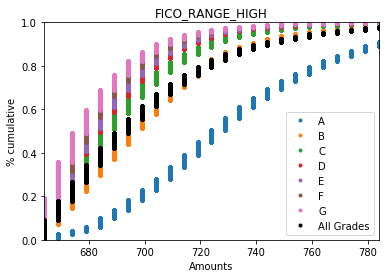

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   6.998591e+02     731.002354     700.895670     691.792013   
std    3.161493e+01      36.668091      29.283086      24.591050   
min    6.290000e+02     664.000000     664.000000     664.000000   
25%    6.740000e+02     704.000000     679.000000     674.000000   
50%    6.940000e+02     724.000000     694.000000     684.000000   
75%    7.140000e+02     754.000000     714.000000     704.000000   
max    8.500000e+02     850.000000     850.000000     850.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean      687.101885     685.911746    683.759794    682.225339  
std        21.610382      20.614452     19.647985     19.046505  
min       664.000000     634.000000    629.000000    664.000000  
25%       669.000000     669.000000    669.000000    669.

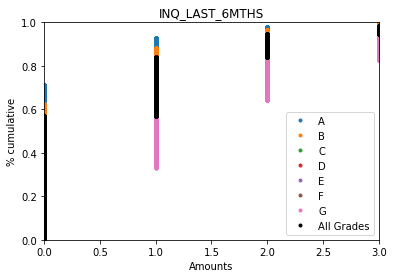

          All loans              A              B              C  \
count  2.507638e+06  434114.000000  731906.000000  711534.000000   
mean   6.620764e-01       0.384761       0.536788       0.714358   
std    9.446772e-01       0.700717       0.830191       0.958561   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    1.000000e+00       1.000000       1.000000       1.000000   
max    8.000000e+00       7.000000       8.000000       8.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean        0.873851       0.972784      1.147079      1.287701  
std         1.065770       1.121766      1.200278      1.275203  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

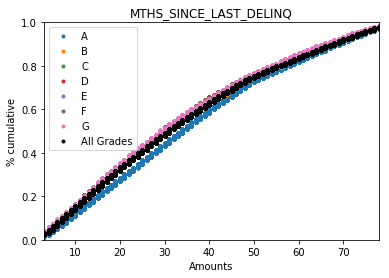

          All loans              A              B              C  \
count  1.244114e+06  167892.000000  370074.000000  372394.000000   
mean   3.426813e+01      36.295964      34.251317      33.917249   
std    2.192451e+01      21.660817      21.975314      21.950655   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    1.600000e+01      18.000000      15.000000      15.000000   
50%    3.100000e+01      34.000000      31.000000      30.000000   
75%    5.000000e+01      52.000000      50.000000      50.000000   
max    2.260000e+02     170.000000     188.000000     188.000000   

                   D             E             F            G  
count  198036.000000  93862.000000  32526.000000  9330.000000  
mean       33.671403     33.809316     33.314210    33.056377  
std        21.867121     22.056075     21.836728    21.652634  
min         0.000000      0.000000      0.000000     0.000000  
25%        15.000000     15.000000     15.000000    15.000000  
50%

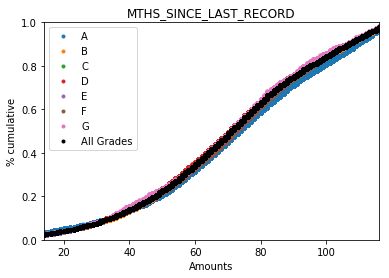

           All loans             A              B              C  \
count  426228.000000  38358.000000  128522.000000  137876.000000   
mean       70.417044     72.207414      70.618042      70.045040   
std        26.664615     27.991554      26.544822      26.493985   
min         0.000000      0.000000       0.000000       0.000000   
25%        53.000000     54.000000      53.000000      52.000000   
50%        71.000000     73.000000      71.000000      71.000000   
75%        90.000000     94.000000      90.000000      89.000000   
max       129.000000    121.000000     123.000000     123.000000   

                  D             E             F            G  
count  72698.000000  33758.000000  11674.000000  3342.000000  
mean      69.775785     70.423722     70.927360    69.584680  
std       26.620149     26.337070     26.506416    26.474203  
min        0.000000      0.000000      0.000000     0.000000  
25%       52.000000     53.000000     53.000000    52.000000  
50%      

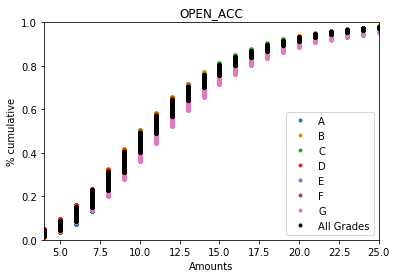

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.159958e+01      11.938772      11.419908      11.495794   
std    5.455954e+00       5.462254       5.327583       5.438498   
min    0.000000e+00       1.000000       1.000000       0.000000   
25%    8.000000e+00       8.000000       8.000000       8.000000   
50%    1.100000e+01      11.000000      10.000000      11.000000   
75%    1.400000e+01      15.000000      14.000000      14.000000   
max    9.000000e+01      80.000000      82.000000      90.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean       11.548210      11.823414     12.009590     12.321549  
std         5.530569       5.628251      5.789047      6.122648  
min         0.000000       0.000000      1.000000      1.000000  
25%         8.000000       8.000000      8.000000      8.

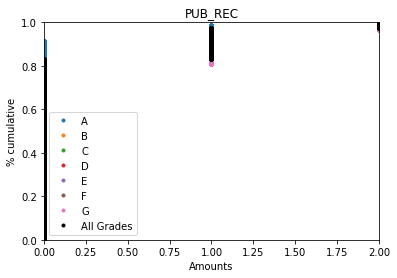

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   2.158827e-01       0.110063       0.220481       0.246973   
std    6.040937e-01       0.435286       0.607322       0.649389   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       0.000000   
max    8.600000e+01      25.000000      63.000000      86.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean        0.250116       0.244565      0.247219      0.252579  
std         0.634626       0.637290      0.665742      0.623784  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

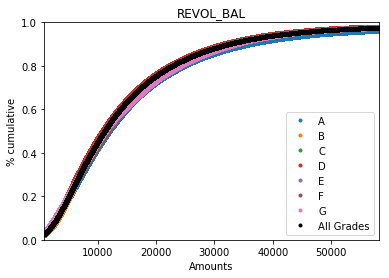

          All loans             A             B             C             D  \
count  2.507640e+06  4.341140e+05  7.319080e+05  7.115340e+05  3.740500e+05   
mean   1.627865e+04  1.837231e+04  1.605198e+04  1.570875e+04  1.540587e+04   
std    2.224600e+04  2.766588e+04  2.137142e+04  2.066595e+04  2.067298e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.997000e+03  6.345000e+03  6.137000e+03  5.862000e+03  5.633000e+03   
50%    1.119200e+04  1.202800e+04  1.105700e+04  1.092200e+04  1.081600e+04   
75%    1.981700e+04  2.154300e+04  1.933100e+04  1.930975e+04  1.928700e+04   
max    2.904836e+06  2.568995e+06  1.743266e+06  1.746716e+06  2.904836e+06   

                  E              F              G  
count  1.774660e+05   61314.000000   17254.000000  
mean   1.625090e+04   16090.985321   16591.768286  
std    2.114537e+04   18703.072590   20758.058643  
min    0.000000e+00       0.000000       0.000000  
25%    5.975000e+03    6036.

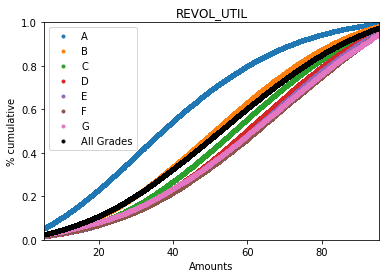

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   5.217030e+01      39.270745      51.041259      55.453836   
std    2.443677e+01      23.099988      23.496409      23.528017   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.400000e+01      21.200000      33.700000      38.425000   
50%    5.260000e+01      37.000000      51.100000      56.300000   
75%    7.100000e+01      55.400000      68.800000      73.600000   
max    8.923000e+02     172.000000     892.300000     366.600000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean       58.142712      59.208800     60.119248     59.092187  
std        23.683929      24.037274     24.533402     25.158072  
min         0.000000       0.000000      0.000000      0.000000  
25%        41.400000      42.400000     43.000000     41.

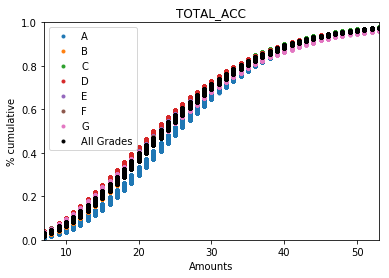

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   2.507237e+01      26.565059      24.995581      24.562205   
std    1.198443e+01      11.669626      11.750495      11.997142   
min    2.000000e+00       2.000000       2.000000       2.000000   
25%    1.600000e+01      18.000000      16.000000      16.000000   
50%    2.300000e+01      25.000000      23.000000      23.000000   
75%    3.200000e+01      33.000000      32.000000      31.000000   
max    1.760000e+02     133.000000     150.000000     151.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean       24.430616      25.048821     25.226539     25.418338  
std        12.228831      12.477680     12.651828     12.922300  
min         2.000000       2.000000      2.000000      3.000000  
25%        15.000000      16.000000     16.000000     16.

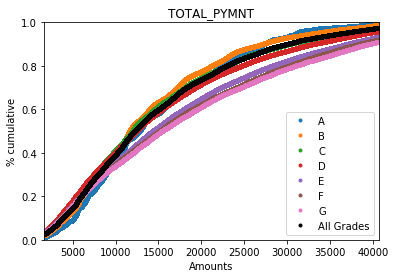

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.485085e+04   14668.126841   13933.200415   14589.310690   
std    1.031403e+04    8719.838671    9144.148287   10433.357061   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    6.896965e+03    7884.772092    6963.969716    6491.133162   
50%    1.217796e+04   12803.750000   11622.126975   11972.824500   
75%    2.059952e+04   20520.920050   18646.484390   20251.658545   
max    6.294899e+04   46459.491980   49776.854880   53218.181810   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean    15394.645014   17413.562449  18292.916640  18779.900108  
std     11448.203513   12722.034764  13443.469066  13881.420079  
min         0.000000       0.000000      0.000000      0.000000  
25%      6349.540113    7019.609997   7094.270000   7207.

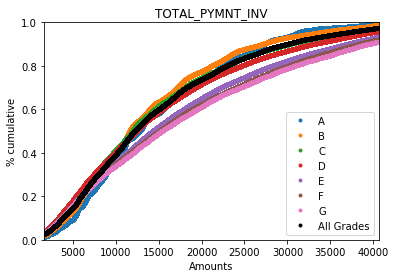

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.482589e+04   14650.213019   13906.566482   14567.266752   
std    1.031252e+04    8725.084080    9141.750435   10434.659899   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    6.878730e+03    7875.080000    6948.050000    6463.170000   
50%    1.215451e+04   12786.040000   11607.510000   11955.800000   
75%    2.057078e+04   20496.470000   18615.260000   20227.667500   
max    6.290403e+04   46459.490000   49776.850000   53218.180000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean    15368.780921   17376.999352  18250.328729  18731.113394  
std     11448.554175   12711.151271  13427.754853  13857.357568  
min         0.000000       0.000000      0.000000      0.000000  
25%      6325.770000    6993.130000   7078.200000   7199.

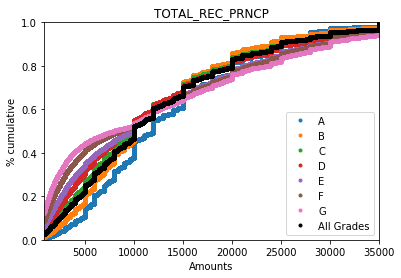

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.219976e+04   13415.009662   12072.107063   11887.112806   
std    8.825014e+03    8042.495287    8111.883090    8931.737153   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    5.093792e+03    7060.730000    6000.000000    5000.000000   
50%    1.000000e+04   12000.000000   10000.000000   10000.000000   
75%    1.737500e+04   19000.000000   16000.000000   16519.445000   
max    4.000000e+04   40000.000000   40000.000000   40000.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean    11717.584152   12199.738435  11795.826290  11820.874349  
std      9477.250419   10275.203012  10651.658291  11245.105016  
min         0.000000       0.000000      0.000000      0.000000  
25%      4000.000000    3265.120000   2441.930000   1785.

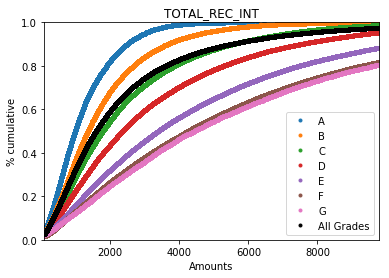

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   2.413194e+03    1204.811696    1743.119212    2461.994893   
std    2.599078e+03     905.114969    1457.709849    2252.273840   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    7.808475e+02     528.950000     718.350000     873.845000   
50%    1.587870e+03     987.160000    1353.025000    1787.660000   
75%    3.048460e+03    1679.140000    2348.750000    3334.840000   
max    2.794899e+04    6459.490000   13907.620000   17667.020000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean     3295.319484    4607.333065   5666.022710   5977.447436  
std      3045.321815    4106.441616   4944.170036   5282.541824  
min         0.000000       0.000000      0.000000      0.000000  
25%      1104.620000    1535.610000   1875.190000   2019.

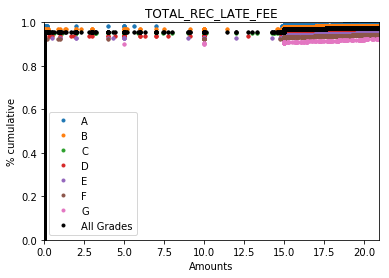

          All loans              A              B             C             D  \
count  2.507640e+06  434114.000000  731908.000000  7.115340e+05  3.740500e+05   
mean   1.523248e+00       0.530589       1.016359  1.660076e+00  2.301597e+00   
std    1.041176e+01       5.834104       7.727658  1.074665e+01  1.330337e+01   
min   -5.100000e-09       0.000000       0.000000 -5.100000e-09 -2.000000e-09   
25%    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00   
50%    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00   
75%    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00   
max    1.188830e+03    1188.830000     592.650000  9.298000e+02  1.098360e+03   

                  E             F             G  
count  1.774660e+05  6.131400e+04  17254.000000  
mean   2.886649e+00  3.413365e+00      4.744365  
std    1.475768e+01  1.720240e+01     19.566212  
min   -1.800000e-09 -2.000000e-10      0.000000  
25%    0.000000e+00 

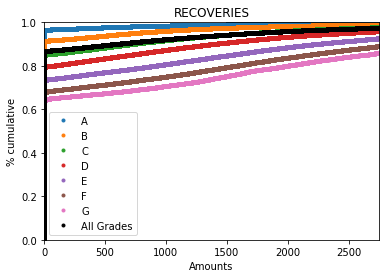

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   2.363670e+02      47.774867     116.957781     238.542928   
std    9.371463e+02     415.290613     612.686536     888.234847   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       0.000000   
max    3.985955e+04   23471.040000   29694.850000   39859.550000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean      379.439794     603.604310    827.654290    976.833957  
std      1163.739462    1538.017478   1868.655342   1903.314084  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

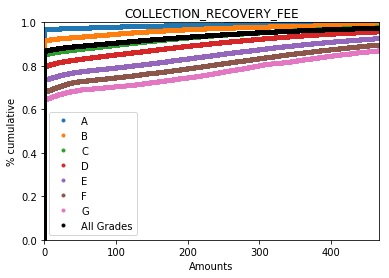

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   3.920173e+01       7.912607      19.277190      40.071995   
std    1.639968e+02      73.090214     106.500574     156.830632   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       0.000000   
max    7.174719e+03    5774.800000    5970.888000    7174.719000   

                   D             E             F             G  
count  374050.000000  177466.00000  61314.000000  17254.000000  
mean       63.230978      99.69572    133.226225    158.476949  
std       205.028216     269.86997    322.001824    335.897207  
min         0.000000       0.00000      0.000000      0.000000  
25%         0.000000       0.00000      0.000000      0.000000

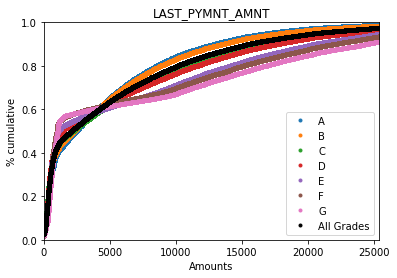

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   5.424672e+03    4786.301104    4918.091409    5607.690745   
std    7.081722e+03    5952.741220    6274.243731    7217.577933   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    4.001700e+02     466.300000     394.170000     374.660000   
50%    2.088640e+03    2454.630000    2335.750000    2199.260000   
75%    8.271613e+03    7112.540000    7336.500000    8787.360000   
max    4.219205e+04   41399.440000   41418.340000   42148.530000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean     5836.619044    6728.746482   6955.413428   7644.339229  
std      7790.055022    8801.961846   9315.953844  10062.206148  
min         0.000000       0.000000      0.000000      0.000000  
25%       375.290000     424.000000    463.910000    518.

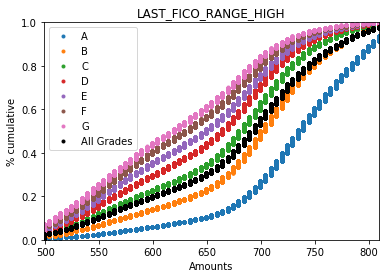

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   6.770336e+02     727.888426     689.277568     664.709164   
std    8.099676e+01      67.134107      73.827160      78.273076   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    6.290000e+02     699.000000     659.000000     609.000000   
50%    6.940000e+02     734.000000     704.000000     684.000000   
75%    7.340000e+02     774.000000     739.000000     719.000000   
max    8.500000e+02     850.000000     850.000000     850.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean      647.838294     636.506024    625.900414    617.857656  
std        79.366039      79.921329     78.837270     77.604597  
min         0.000000       0.000000      0.000000    499.000000  
25%       584.000000     569.000000    559.000000    549.

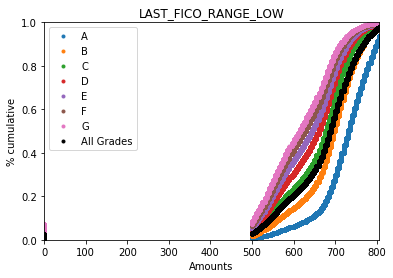

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   6.602392e+02     721.056428     677.477497     645.954276   
std    1.314728e+02      84.828242     110.537360     134.545014   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    6.250000e+02     695.000000     655.000000     605.000000   
50%    6.900000e+02     730.000000     700.000000     680.000000   
75%    7.300000e+02     770.000000     735.000000     715.000000   
max    8.450000e+02     845.000000     845.000000     845.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean      623.445956     607.057295    591.432789    577.078359  
std       148.483588     159.171119    167.634169    177.820119  
min         0.000000       0.000000      0.000000      0.000000  
25%       580.000000     565.000000    555.000000    545.

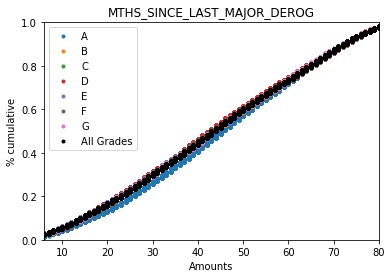

           All loans             A              B              C  \
count  658410.000000  72444.000000  194084.000000  205660.000000   
mean       43.647572     45.151869      43.609942      43.461947   
std        21.359458     20.704181      21.449038      21.421356   
min         0.000000      0.000000       0.000000       0.000000   
25%        27.000000     29.000000      26.000000      26.000000   
50%        44.000000     45.000000      44.000000      43.000000   
75%        61.000000     62.000000      61.000000      61.000000   
max       226.000000    170.000000     188.000000     188.000000   

                   D             E             F            G  
count  111094.000000  52168.000000  17720.000000  5240.000000  
mean       43.128342     43.530402     43.674718    43.612595  
std        21.394053     21.515067     21.358719    21.345464  
min         0.000000      0.000000      0.000000     0.000000  
25%        26.000000     26.000000     27.000000    27.000000  
50%

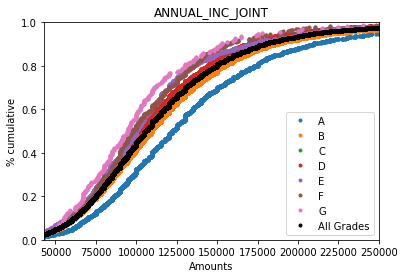

          All loans             A             B              C              D  \
count  3.655400e+04  4.490000e+03  8.982000e+03   12068.000000    6572.000000   
mean   1.163916e+05  1.356286e+05  1.202943e+05  112379.692963  111062.781668   
std    5.704025e+04  7.155102e+04  6.081597e+04   50342.486247   51633.981923   
min    1.100000e+04  2.500000e+04  2.091800e+04   11000.000000   17950.000000   
25%    8.000000e+04  9.300000e+04  8.200000e+04   80000.000000   77000.000000   
50%    1.060000e+05  1.229000e+05  1.100000e+05  104000.000000  102000.000000   
75%    1.400000e+05  1.620000e+05  1.450000e+05  135000.000000  135000.000000   
max    1.350000e+06  1.350000e+06  1.210000e+06  690000.000000  780000.000000   

                   E              F              G  
count    2958.000000    1016.000000     468.000000  
mean   108577.035957  107819.483071  103218.099786  
std     51108.115351   53794.661946   55761.941142  
min     15400.000000   30924.000000   28000.000000  
25%  

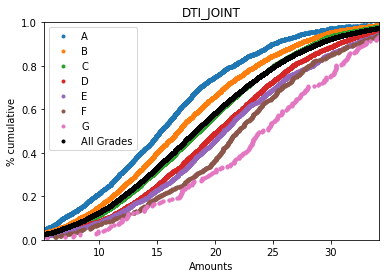

          All loans            A            B             C            D  \
count  36552.000000  4490.000000  8980.000000  12068.000000  6572.000000   
mean      18.686105    15.726998    17.325837     18.809629    20.362191   
std        7.573205     6.886017     7.143168      7.327063     7.602656   
min        0.000000     0.320000     0.210000      0.000000     0.000000   
25%       13.217500    10.900000    12.150000     13.550000    15.030000   
50%       18.265000    15.260000    16.805000     18.600000    20.170000   
75%       23.832500    20.000000    22.080000     23.810000    25.520000   
max       69.490000    44.780000    43.910000     61.280000    61.900000   

                 E            F           G  
count  2958.000000  1016.000000  468.000000  
mean     21.146146    22.042677   23.618974  
std       8.115178     7.701429    7.664150  
min       1.270000     3.750000    3.640000  
25%      15.615000    17.217500   17.760000  
50%      20.750000    22.000000   24.09

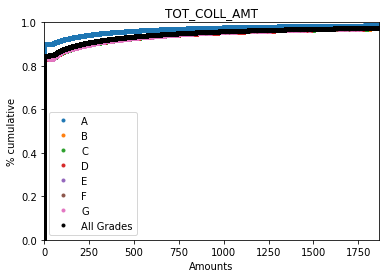

          All loans              A              B             C             D  \
count  2.372586e+06  400818.000000  689040.000000  6.837020e+05  3.562740e+05   
mean   2.495436e+02     140.618316     261.776922  2.899208e+02  2.821199e+02   
std    1.146587e+04    1420.239197    2906.092376  1.816500e+04  1.484883e+04   
min    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00   
25%    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00   
50%    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00   
75%    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00   
max    9.152545e+06   95806.000000  932461.000000  9.152545e+06  6.214661e+06   

                   E              F             G  
count  168510.000000   57920.000000  16322.000000  
mean      228.793448     247.930214    225.524200  
std      1889.608759    2919.851202   1412.383827  
min         0.000000       0.000000      0.000000  
25%       

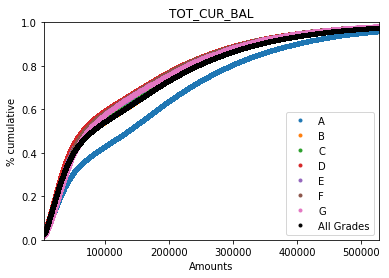

          All loans             A             B             C             D  \
count  2.372586e+06  4.008180e+05  6.890400e+05  6.837020e+05  3.562740e+05   
mean   1.409872e+05  1.782387e+05  1.403058e+05  1.317498e+05  1.257087e+05   
std    1.570073e+05  1.787685e+05  1.568433e+05  1.502532e+05  1.444685e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.954400e+04  3.907500e+04  2.832300e+04  2.775400e+04  2.753500e+04   
50%    8.044100e+04  1.363870e+05  8.040150e+04  7.018500e+04  6.489200e+04   
75%    2.104650e+05  2.613460e+05  2.103990e+05  1.965458e+05  1.863530e+05   
max    8.000078e+06  4.535114e+06  5.445012e+06  8.000078e+06  4.447397e+06   

                  E             F             G  
count  1.685100e+05  5.792000e+04  1.632200e+04  
mean   1.300676e+05  1.287266e+05  1.316539e+05  
std    1.466581e+05  1.425548e+05  1.415245e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    3.030500e+04  3.158450e+04  3.3

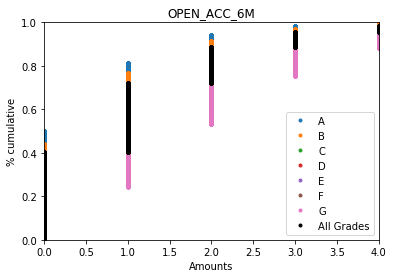

           All loans              A              B              C  \
count  902852.000000  148696.000000  262766.000000  275416.000000   
mean        1.058065       0.775623       0.921778       1.107975   
std         1.214448       0.989313       1.089370       1.228665   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         2.000000       1.000000       1.000000       2.000000   
max        18.000000      12.000000      14.000000      18.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        1.278233      1.407346      1.559279     1.685171  
std         1.345050      1.433659      1.507137     1.555992  
min         0.000000      0.000000      0.000000     0.000000  
25%         0.000000      0.000000      0.000000     1.000

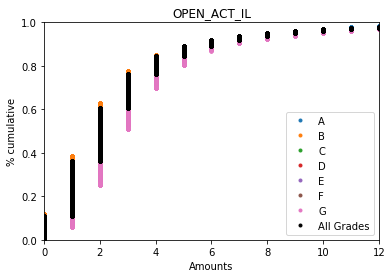

           All loans              A              B              C  \
count  902854.000000  148696.000000  262768.000000  275416.000000   
mean        2.810523       2.704659       2.732677       2.818783   
std         3.004407       2.900799       2.981613       3.024509   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         2.000000       2.000000       2.000000       2.000000   
75%         3.000000       3.000000       3.000000       3.000000   
max        57.000000      41.000000      43.000000      57.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        2.910398      2.981219      3.167822     3.277307  
std         3.078776      3.005597      3.136057     3.146338  
min         0.000000      0.000000      0.000000     0.000000  
25%         1.000000      1.000000      1.000000     1.000

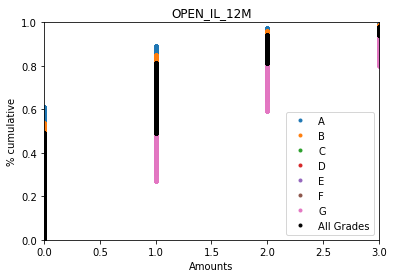

           All loans              A              B              C  \
count  902854.000000  148696.000000  262768.000000  275416.000000   
mean        0.785077       0.532846       0.666596       0.820294   
std         0.998134       0.797427       0.890755       1.005411   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max        25.000000      11.000000      12.000000      21.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        0.972766      1.106601      1.304224     1.451298  
std         1.111447      1.153117      1.282010     1.326867  
min         0.000000      0.000000      0.000000     0.000000  
25%         0.000000      0.000000      0.000000     0.000

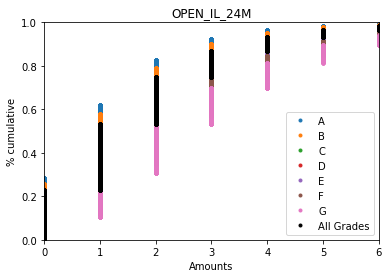

           All loans              A              B              C  \
count  902854.000000  148696.000000  262768.000000  275416.000000   
mean        1.759733       1.405310       1.567870       1.808994   
std         1.693012       1.390221       1.530396       1.711084   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         3.000000       2.000000       2.000000       3.000000   
max        51.000000      20.000000      21.000000      31.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        2.035906      2.254035      2.579782     2.794140  
std         1.877800      1.935633      2.111215     2.174977  
min         0.000000      0.000000      0.000000     0.000000  
25%         1.000000      1.000000      1.000000     1.000

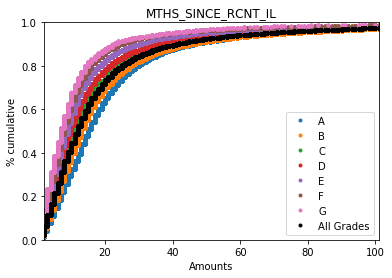

           All loans              A              B              C  \
count  879998.000000  146176.000000  255806.000000  267516.000000   
mean       19.407771      22.420657      21.140309      18.874953   
std        24.603680      24.792695      25.866808      24.578912   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       8.000000       7.000000       6.000000   
50%        12.000000      15.000000      13.000000      11.000000   
75%        22.000000      26.000000      23.000000      21.000000   
max       511.000000     339.000000     511.000000     488.000000   

                   D             E             F            G  
count  126070.000000  56104.000000  20662.000000  7664.000000  
mean       17.096153     14.817232     12.876101    11.952505  
std        23.737918     20.790377     18.510744    17.611725  
min         0.000000      0.000000      0.000000     0.000000  
25%         5.000000      5.000000      4.000000     4.000

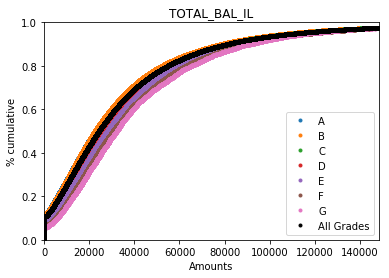

          All loans             A             B             C              D  \
count  9.028540e+05  1.486960e+05  2.627680e+05  2.754160e+05  129618.000000   
mean   3.606312e+04  3.512466e+04  3.444378e+04  3.615484e+04   37560.900554   
std    4.288981e+04  4.441491e+04  4.262049e+04  4.219337e+04   42573.213908   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    9.859000e+03  8.599750e+03  8.759000e+03  1.003300e+04   11072.000000   
50%    2.432900e+04  2.266450e+04  2.257950e+04  2.467150e+04   25993.000000   
75%    4.695300e+04  4.513925e+04  4.450425e+04  4.726725e+04   49192.000000   
max    1.711009e+06  1.044916e+06  1.547285e+06  1.062286e+06  624244.000000   

                  E              F              G  
count  5.750400e+04   21070.000000    7782.000000  
mean   3.906120e+04   41648.565164   43203.427911  
std    4.384066e+04   41966.817733   43358.875248  
min    0.000000e+00       0.000000       0.000000  
25%    1.283400e+04

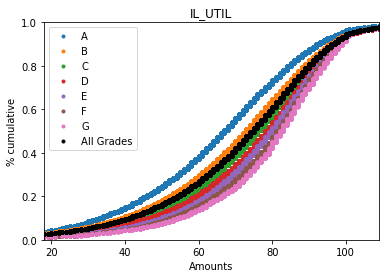

           All loans              A              B              C  \
count  783574.000000  126472.000000  225608.000000  238914.000000   
mean       71.670004      65.042776      70.151014      73.149635   
std        22.775452      23.300570      23.188028      22.345949   
min         0.000000       0.000000       0.000000       0.000000   
25%        59.000000      51.000000      57.000000      61.000000   
50%        75.000000      67.000000      73.000000      76.000000   
75%        87.000000      81.000000      86.000000      88.000000   
max       558.000000     265.000000     558.000000     376.000000   

                   D             E             F            G  
count  114388.000000  51724.000000  19296.000000  7172.000000  
mean       75.114977     76.543848     78.191024    79.389292  
std        21.789193     20.707567     19.589757    19.987338  
min         0.000000      0.000000      0.000000     0.000000  
25%        64.000000     66.000000     69.000000    71.000

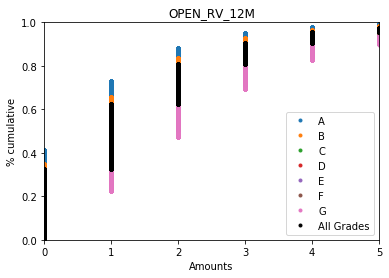

           All loans              A              B              C  \
count  902854.000000  148696.000000  262768.000000  275416.000000   
mean        1.436106       1.057957       1.290203       1.529969   
std         1.582616       1.262267       1.426235       1.621796   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         2.000000       2.000000       2.000000       2.000000   
max        28.000000      16.000000      22.000000      28.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        1.684272      1.811109      1.924632     2.039065  
std         1.752403      1.881385      1.941284     2.006676  
min         0.000000      0.000000      0.000000     0.000000  
25%         0.000000      0.000000      1.000000     1.000

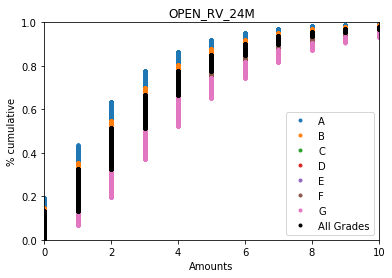

           All loans              A              B              C  \
count  902854.000000  148696.000000  262768.000000  275416.000000   
mean        3.036376       2.314158       2.794686       3.221432   
std         2.714445       2.212629       2.495267       2.777405   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         2.000000       2.000000       2.000000       3.000000   
75%         4.000000       3.000000       4.000000       4.000000   
max        53.000000      38.000000      36.000000      49.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        3.470120      3.679918      3.915615     4.087381  
std         2.949604      3.095966      3.259731     3.317895  
min         0.000000      0.000000      0.000000     0.000000  
25%         1.000000      2.000000      2.000000     2.000

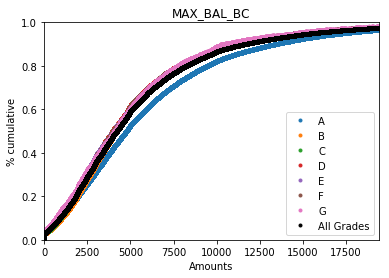

           All loans              A              B              C  \
count  902854.000000  148696.000000  262768.000000  275416.000000   
mean     5549.137739    6260.812786    5548.001096    5413.451513   
std      5490.696393    6201.703300    5236.702146    5130.434516   
min         0.000000       0.000000       0.000000       0.000000   
25%      2203.000000    2443.000000    2296.000000    2161.000000   
50%      4217.000000    4765.000000    4207.000000    4113.000000   
75%      7203.000000    8303.250000    7120.000000    7008.250000   
max    776843.000000  457521.000000  298260.000000  301210.000000   

                   D              E              F             G  
count  129618.000000   57504.000000   21070.000000   7782.000000  
mean     5236.707448    5224.573351    5262.774276   5168.723464  
std      6049.792230    5023.008473    5168.026049   4880.703740  
min         0.000000       0.000000       0.000000      0.000000  
25%      2009.000000    2006.000000    2030

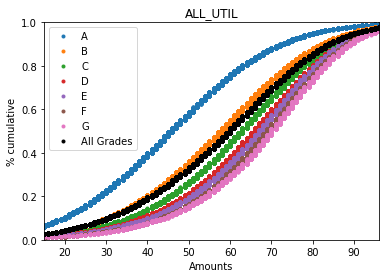

           All loans              A              B              C  \
count  902774.000000  148680.000000  262752.000000  275400.000000   
mean       58.539736      46.153861      57.076879      61.536768   
std        20.814758      20.287163      20.293432      19.737649   
min         0.000000       0.000000       0.000000       0.000000   
25%        45.000000      32.000000      44.000000      49.000000   
50%        60.000000      46.000000      58.000000      63.000000   
75%        73.000000      60.000000      71.000000      75.000000   
max       198.000000     172.000000     162.000000     198.000000   

                   D             E             F            G  
count  129594.000000  57496.000000  21070.000000  7782.000000  
mean       64.301974     65.406776     67.296820    68.103829  
std        19.381034     19.063058     18.261699    18.481946  
min         0.000000      0.000000      0.000000     0.000000  
25%        53.000000     54.000000     57.000000    58.000

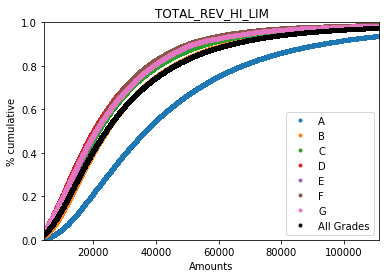

          All loans             A             B             C             D  \
count  2.372586e+06  4.008180e+05  6.890400e+05  6.837020e+05  3.562740e+05   
mean   3.260832e+04  4.800046e+04  3.248133e+04  2.878837e+04  2.664892e+04   
std    3.667124e+04  5.363523e+04  3.205840e+04  2.899615e+04  3.559458e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.400000e+04  2.200000e+04  1.460000e+04  1.270000e+04  1.160000e+04   
50%    2.400000e+04  3.660000e+04  2.420000e+04  2.150000e+04  2.000000e+04   
75%    4.040000e+04  5.970000e+04  4.010000e+04  3.590000e+04  3.350000e+04   
max    9.999999e+06  9.999999e+06  2.013133e+06  1.998700e+06  9.999999e+06   

                  E              F              G  
count  1.685100e+05   57920.000000   16322.000000  
mean   2.721870e+04   26478.678108   27472.299841  
std    2.774022e+04   25044.053923   27200.563893  
min    0.000000e+00       0.000000       0.000000  
25%    1.220000e+04   12000.

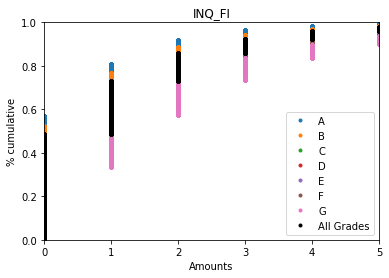

           All loans              A              B              C  \
count  902854.000000  148696.000000  262768.000000  275416.000000   
mean        1.094476       0.770781       0.948989       1.161951   
std         1.591920       1.189831       1.411728       1.640602   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         2.000000       1.000000       1.000000       2.000000   
max        48.000000      17.000000      24.000000      32.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        1.332423      1.438648      1.640437     1.819327  
std         1.820164      1.885989      2.091049     2.253900  
min         0.000000      0.000000      0.000000     0.000000  
25%         0.000000      0.000000      0.000000     0.000

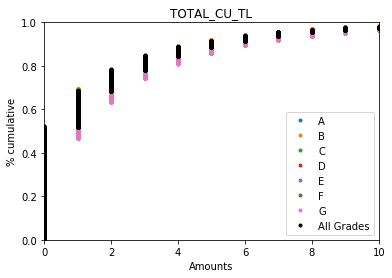

           All loans              A              B              C  \
count  902852.000000  148696.000000  262766.000000  275416.000000   
mean        1.627020       1.609028       1.568262       1.624452   
std         2.840274       2.716281       2.746155       2.860640   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.000000       2.000000       2.000000       2.000000   
max        79.000000      49.000000      79.000000      56.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        1.676974      1.726523      1.811770     1.978155  
std         2.982332      2.976799      3.071347     3.329605  
min         0.000000      0.000000      0.000000     0.000000  
25%         0.000000      0.000000      0.000000     0.000

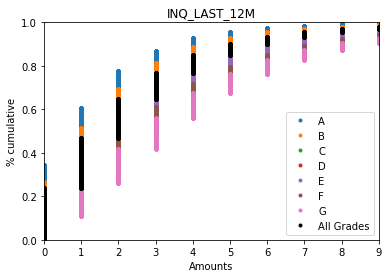

           All loans              A              B              C  \
count  902852.000000  148696.000000  262766.000000  275416.000000   
mean        2.337070       1.587279       2.036154       2.482652   
std         2.560217       1.893114       2.258256       2.593561   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         2.000000       1.000000       1.000000       2.000000   
75%         3.000000       2.000000       3.000000       4.000000   
max        67.000000      27.000000      35.000000      41.000000   

                   D             E             F            G  
count  129618.000000  57504.000000  21070.000000  7782.000000  
mean        2.862766      3.119609      3.524917     3.917502  
std         2.900165      3.033470      3.361482     3.612816  
min         0.000000      0.000000      0.000000     0.000000  
25%         1.000000      1.000000      1.000000     1.000

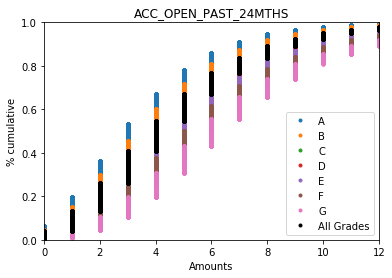

          All loans              A              B              C  \
count  2.413078e+06  409588.000000  702986.000000  692556.000000   
mean   4.688353e+00       3.772156       4.283619       4.903228   
std    3.178227e+00       2.669379       2.906764       3.197237   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    2.000000e+00       2.000000       2.000000       3.000000   
50%    4.000000e+00       3.000000       4.000000       4.000000   
75%    6.000000e+00       5.000000       6.000000       7.000000   
max    6.400000e+01      39.000000      42.000000      64.000000   

                   D              E             F             G  
count  361662.000000  170882.000000  58878.000000  16526.000000  
mean        5.300900       5.692115      6.125106      6.704587  
std         3.391743       3.576063      3.784918      3.968437  
min         0.000000       0.000000      0.000000      0.000000  
25%         3.000000       3.000000      3.000000      4.

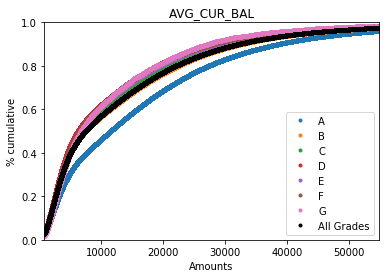

          All loans              A              B              C  \
count  2.372550e+06  400818.000000  689040.000000  683690.000000   
mean   1.346558e+04   16942.527466   13600.018042   12628.817198   
std    1.620906e+04   18622.096816   16412.488585   15487.237262   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.107000e+03    3903.000000    3038.000000    2962.000000   
50%    7.417000e+03   11496.000000    7479.500000    6673.000000   
75%    1.870075e+04   23720.000000   19039.000000   17420.000000   
max    9.580840e+05  463698.000000  958084.000000  800008.000000   

                   D              E              F              G  
count  356258.000000  168502.000000   57920.000000   16322.000000  
mean    11914.703153   12049.776513   11822.176796   11755.209411  
std     14799.817958   14490.222574   14217.066657   13341.669251  
min         0.000000       0.000000       0.000000       0.000000  
25%      2921.000000    3098.000000    3168.750

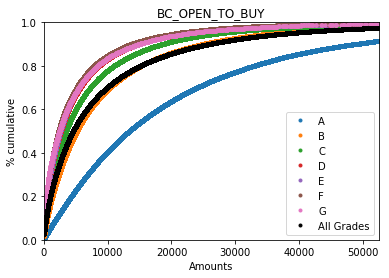

          All loans              A              B             C  \
count  2.387790e+06  407296.000000  697088.000000  684906.00000   
mean   9.996360e+03   20757.008087    9985.151221    7315.80291   
std    1.513031e+04   22765.200684   13976.623869   11137.79445   
min    0.000000e+00       0.000000       0.000000       0.00000   
25%    1.423000e+03    5526.000000    1816.000000    1091.00000   
50%    4.588000e+03   13387.000000    5162.000000    3483.00000   
75%    1.210900e+04   27996.250000   12441.000000    8858.00000   
max    5.599120e+05  497445.000000  454843.000000  559912.00000   

                   D              E              F              G  
count  356380.000000  168144.000000   57804.000000   16172.000000  
mean     5865.187889    5660.610298    5333.581724    5779.074573  
std      9388.840707    9145.941955    8898.514111    9574.724155  
min         0.000000       0.000000       0.000000       0.000000  
25%       769.000000     706.000000     591.000000     5

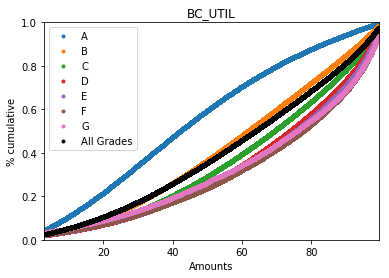

          All loans              A              B              C  \
count  2.386342e+06  407082.000000  696716.000000  684492.000000   
mean   6.044169e+01      44.348038      59.152312      64.602798   
std    2.812853e+01      26.641893      27.011839      26.936283   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.900000e+01      22.800000      39.000000      45.500000   
50%    6.380000e+01      42.200000      61.700000      69.300000   
75%    8.510000e+01      64.600000      82.200000      88.000000   
max    3.396000e+02     187.000000     190.600000     318.200000   

                  D              E             F             G  
count  356118.00000  168030.000000  57752.000000  16152.000000  
mean       67.72336      68.515007     69.622146     67.972845  
std        26.87913      27.285360     27.674463     28.902784  
min         0.00000       0.000000      0.000000      0.000000  
25%        49.80000      50.300000     51.600000     48.300000

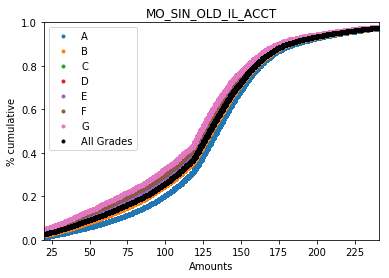

          All loans              A              B              C  \
count  2.302254e+06  392902.000000  668906.000000  661608.000000   
mean   1.259644e+02     132.986572     127.586513     123.975517   
std    5.210205e+01      48.897474      51.381280      52.761418   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    9.800000e+01     109.000000     100.000000      95.000000   
50%    1.290000e+02     134.000000     130.000000     128.000000   
75%    1.520000e+02     156.000000     153.000000     151.000000   
max    9.990000e+02     724.000000     822.000000     999.000000   

                   D              E             F             G  
count  343846.000000  163064.000000  56046.000000  15882.000000  
mean      122.063680     121.679193    119.771081    117.082861  
std        53.649621      53.554642     53.897934     54.454770  
min         0.000000       0.000000      0.000000      1.000000  
25%        91.000000      92.000000     89.000000     84.

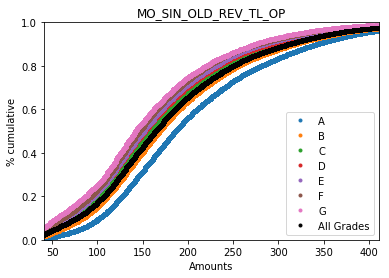

          All loans              A              B              C  \
count  2.372584e+06  400818.000000  689040.000000  683702.000000   
mean   1.816926e+02     206.684605     187.063976     174.711205   
std    9.415688e+01      97.097111      94.470494      92.425918   
min    2.000000e+00       5.000000       5.000000       3.000000   
25%    1.170000e+02     137.000000     122.000000     112.000000   
50%    1.640000e+02     186.000000     169.000000     158.000000   
75%    2.300000e+02     258.000000     236.000000     222.000000   
max    8.510000e+02     851.000000     818.000000     783.000000   

                   D              E             F             G  
count  356272.000000  168510.000000  57920.000000  16322.000000  
mean      168.275632     166.186327    161.745407    157.379120  
std        90.929214      88.492823     86.900881     86.374409  
min         2.000000       3.000000      5.000000      2.000000  
25%       107.000000     107.000000    104.000000    100.

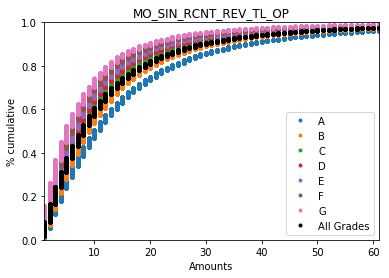

          All loans              A              B              C  \
count  2.372584e+06  400818.000000  689040.000000  683702.000000   
mean   1.306656e+01      16.393595      13.913721      12.255889   
std    1.624667e+01      18.839936      16.693643      15.355956   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    4.000000e+00       5.000000       4.000000       3.000000   
50%    8.000000e+00      10.000000       9.000000       7.000000   
75%    1.600000e+01      20.000000      17.000000      15.000000   
max    4.380000e+02     438.000000     330.000000     343.000000   

                   D              E             F             G  
count  356272.000000  168510.000000  57920.000000  16322.000000  
mean       11.154977      10.593199      9.677797      8.845852  
std        14.579522      14.173625     13.281684     11.812912  
min         0.000000       0.000000      0.000000      0.000000  
25%         3.000000       3.000000      3.000000      2.

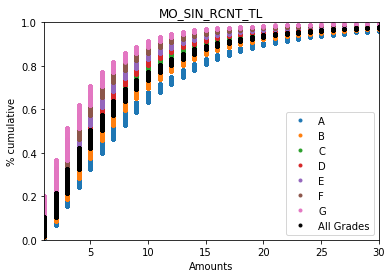

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   7.849721e+00       9.730626       8.551074       7.381968   
std    8.706316e+00       9.963721       9.188518       8.221236   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.000000e+00       4.000000       3.000000       3.000000   
50%    5.000000e+00       7.000000       6.000000       5.000000   
75%    1.000000e+01      13.000000      11.000000       9.000000   
max    3.140000e+02     226.000000     289.000000     233.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        6.608223       6.135244      5.481802      4.848425  
std         7.571143       7.252227      6.342668      6.199505  
min         0.000000       0.000000      0.000000      0.000000  
25%         2.000000       2.000000      2.000000      2.

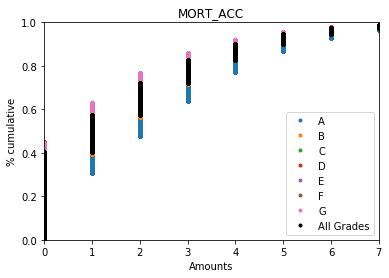

          All loans              A              B              C  \
count  2.413078e+06  409588.000000  702986.000000  692556.000000   
mean   1.685370e+00       2.078205       1.711277       1.579985   
std    2.012596e+00       2.117042       2.010772       1.965400   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    1.000000e+00       2.000000       1.000000       1.000000   
75%    3.000000e+00       3.000000       3.000000       3.000000   
max    5.100000e+01      31.000000      35.000000      37.000000   

                   D              E             F             G  
count  361662.000000  170882.000000  58878.000000  16526.000000  
mean        1.494119       1.547208      1.513333      1.490500  
std         1.945337       1.972564      1.979861      2.005771  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

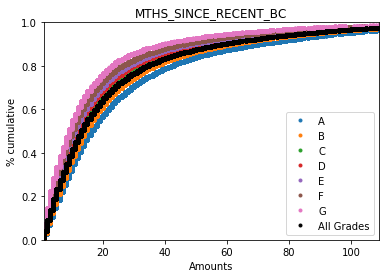

          All loans              A              B              C  \
count  2.389502e+06  407504.000000  697600.000000  685392.000000   
mean   2.379957e+01      28.379569      25.155298      22.585358   
std    3.060687e+01      34.619877      31.310493      29.329244   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    6.000000e+00       7.000000       7.000000       6.000000   
50%    1.300000e+01      16.000000      14.000000      13.000000   
75%    2.800000e+01      35.000000      30.000000      27.000000   
max    6.390000e+02     639.000000     610.000000     611.000000   

                   D              E             F             G  
count  356650.000000  168284.000000  57884.000000  16188.000000  
mean       21.061203      20.131860     18.996545     17.125525  
std        28.107723      27.364736     26.445293     25.428402  
min         0.000000       0.000000      0.000000      0.000000  
25%         5.000000       5.000000      4.000000      4.

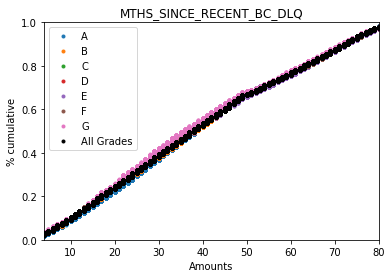

           All loans             A              B              C  \
count  596230.000000  75594.000000  179462.000000  180694.000000   
mean       39.696932     39.905495      39.798865      39.641416   
std        22.717589     22.289652      22.716534      22.784866   
min         0.000000      0.000000       0.000000       0.000000   
25%        21.000000     22.000000      21.000000      20.000000   
50%        38.000000     38.000000      38.000000      38.000000   
75%        59.000000     58.000000      59.000000      59.000000   
max       189.000000    170.000000     189.000000     158.000000   

                  D             E             F            G  
count  95398.000000  45036.000000  15714.000000  4332.000000  
mean      39.477012     39.804379     39.454499    38.755771  
std       22.787859     22.934082     22.815947    23.112404  
min        0.000000      0.000000      0.000000     0.000000  
25%       20.000000     21.000000     20.000000    20.000000  
50%      

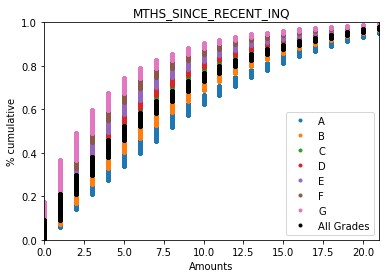

          All loans              A              B              C  \
count  2.178022e+06  345324.000000  625044.000000  636382.000000   
mean   6.709784e+00       8.347488       7.367245       6.358942   
std    5.851616e+00       6.249020       5.964157       5.675145   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    2.000000e+00       3.000000       2.000000       2.000000   
50%    5.000000e+00       7.000000       6.000000       5.000000   
75%    1.000000e+01      13.000000      11.000000       9.000000   
max    2.500000e+01      25.000000      25.000000      25.000000   

                   D              E             F             G  
count  337650.000000  161392.000000  56228.000000  16002.000000  
mean        5.671873       5.210605      4.591947      4.102487  
std         5.424915       5.213254      4.878049      4.614181  
min         0.000000       0.000000      0.000000      0.000000  
25%         1.000000       1.000000      1.000000      1.

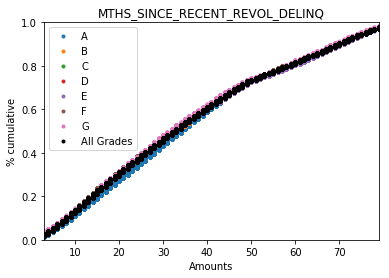

           All loans              A              B              C  \
count  840150.000000  111592.000000  252586.000000  253268.000000   
mean       35.804230      36.479568      35.785261      35.662026   
std        22.445003      21.945415      22.473069      22.512724   
min         0.000000       0.000000       0.000000       0.000000   
25%        17.000000      18.000000      17.000000      17.000000   
50%        33.000000      34.000000      33.000000      32.000000   
75%        52.000000      52.000000      52.000000      52.000000   
max       197.000000     170.000000     188.000000     165.000000   

                   D             E             F            G  
count  132872.000000  62232.000000  21572.000000  6028.000000  
mean       35.593624     35.893752     35.418969    35.168547  
std        22.546531     22.700659     22.470307    22.335395  
min         0.000000      0.000000      0.000000     0.000000  
25%        16.000000     17.000000     16.000000    16.000

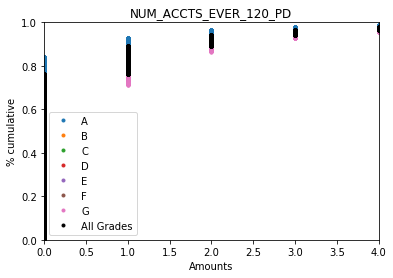

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   5.094880e-01       0.326497       0.524132       0.553329   
std    1.321659e+00       1.049446       1.343390       1.387482   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       1.000000   
max    5.100000e+01      33.000000      32.000000      51.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        0.564521       0.561854      0.562258      0.619409  
std         1.378803       1.354825      1.355884      1.429935  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

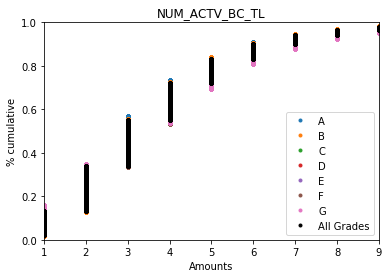

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   3.650632e+00       3.583432       3.625296       3.666366   
std    2.241497e+00       2.221916       2.181580       2.236602   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    2.000000e+00       2.000000       2.000000       2.000000   
50%    3.000000e+00       3.000000       3.000000       3.000000   
75%    5.000000e+00       5.000000       5.000000       5.000000   
max    3.500000e+01      32.000000      33.000000      35.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        3.691737       3.717809      3.754593      3.751624  
std         2.297193       2.338231      2.393994      2.529394  
min         0.000000       0.000000      0.000000      0.000000  
25%         2.000000       2.000000      2.000000      2.

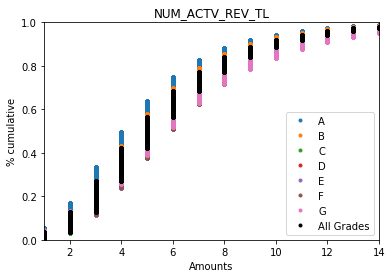

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   5.662781e+00       5.120863       5.533737       5.789663   
std    3.293362e+00       3.057306       3.132179       3.307061   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.000000e+00       3.000000       3.000000       3.000000   
50%    5.000000e+00       5.000000       5.000000       5.000000   
75%    7.000000e+00       7.000000       7.000000       7.000000   
max    6.300000e+01      42.000000      63.000000      57.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        5.972285       6.088363      6.170062      6.153658  
std         3.481277       3.590920      3.707570      3.829868  
min         0.000000       0.000000      0.000000      0.000000  
25%         4.000000       4.000000      4.000000      3.

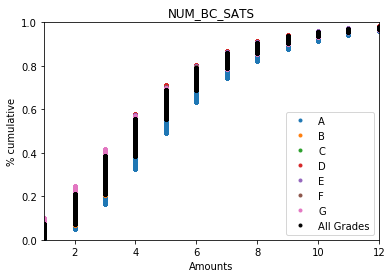

          All loans              A              B              C  \
count  2.395958e+06  405168.000000  697098.000000  689100.000000   
mean   4.732535e+00       5.183805       4.719256       4.617934   
std    2.938490e+00       3.130242       2.892162       2.870299   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.000000e+00       3.000000       3.000000       3.000000   
50%    4.000000e+00       5.000000       4.000000       4.000000   
75%    6.000000e+00       7.000000       6.000000       6.000000   
max    6.300000e+01      46.000000      49.000000      63.000000   

                   D              E             F             G  
count  359724.000000  169910.000000  58486.000000  16472.000000  
mean        4.555993       4.598776      4.618302      4.629553  
std         2.879520       2.931538      2.949088      3.036514  
min         0.000000       0.000000      0.000000      0.000000  
25%         3.000000       3.000000      3.000000      3.

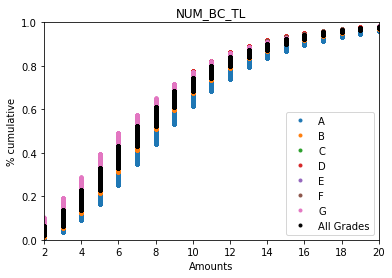

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   8.155501e+00       9.096118       8.302453       7.858845   
std    4.811194e+00       5.090036       4.782992       4.683514   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    5.000000e+00       5.000000       5.000000       4.000000   
50%    7.000000e+00       8.000000       7.000000       7.000000   
75%    1.100000e+01      12.000000      11.000000      10.000000   
max    7.000000e+01      68.000000      70.000000      70.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        7.677647       7.729939      7.729696      7.614753  
std         4.650734       4.747787      4.789526      4.856053  
min         0.000000       0.000000      0.000000      0.000000  
25%         4.000000       4.000000      4.000000      4.

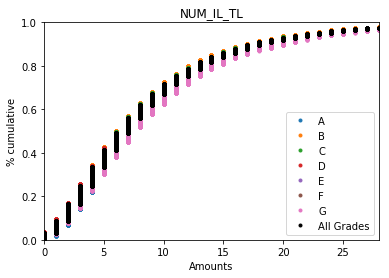

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   8.575470e+00       8.733744       8.354946       8.498831   
std    7.378384e+00       7.089840       7.172567       7.404364   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    4.000000e+00       4.000000       3.000000       3.000000   
50%    7.000000e+00       7.000000       6.000000       7.000000   
75%    1.100000e+01      12.000000      11.000000      11.000000   
max    1.500000e+02      98.000000      91.000000     117.000000   

                   D             E             F             G  
count  356274.000000  168510.00000  57920.000000  16322.000000  
mean        8.658033       8.97396      9.118681      9.364661  
std         7.690157       7.78625      7.924328      8.056056  
min         0.000000       0.00000      0.000000      0.000000  
25%         3.000000       4.00000      4.000000      4.000000

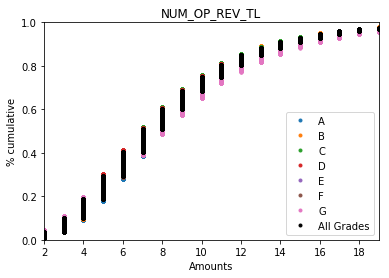

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   8.290561e+00       8.552480       8.203994       8.198987   
std    4.542967e+00       4.687062       4.420242       4.490932   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    5.000000e+00       5.000000       5.000000       5.000000   
50%    7.000000e+00       8.000000       7.000000       7.000000   
75%    1.000000e+01      11.000000      10.000000      10.000000   
max    8.300000e+01      79.000000      71.000000      83.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        8.231749       8.406207      8.518025      8.631663  
std         4.560734       4.685795      4.811682      5.018888  
min         0.000000       0.000000      0.000000      0.000000  
25%         5.000000       5.000000      5.000000      5.

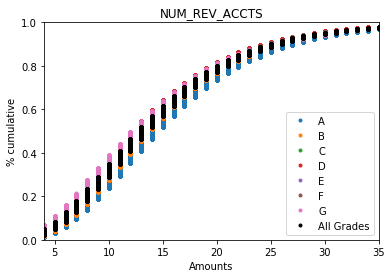

          All loans              A              B              C  \
count  2.372584e+06  400818.000000  689040.000000  683700.000000   
mean   1.469201e+01      15.722088      14.836262      14.340445   
std    8.123022e+00       8.381065       8.040694       8.012656   
min    0.000000e+00       1.000000       1.000000       1.000000   
25%    9.000000e+00      10.000000       9.000000       9.000000   
50%    1.300000e+01      14.000000      13.000000      13.000000   
75%    1.900000e+01      20.000000      19.000000      18.000000   
max    1.280000e+02     105.000000     128.000000     113.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean       14.163795      14.356323     14.353384     14.230854  
std         8.010559       8.208184      8.250916      8.368285  
min         0.000000       2.000000      1.000000      2.000000  
25%         8.000000       8.000000      8.000000      8.

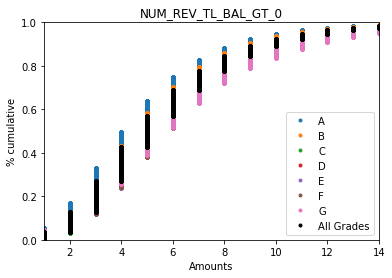

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   5.613787e+00       5.093903       5.488120       5.734112   
std    3.210057e+00       2.985390       3.046354       3.225958   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.000000e+00       3.000000       3.000000       3.000000   
50%    5.000000e+00       5.000000       5.000000       5.000000   
75%    7.000000e+00       7.000000       7.000000       7.000000   
max    4.500000e+01      35.000000      43.000000      44.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        5.907734       6.028532      6.122859      6.140792  
std         3.389839       3.502979      3.626052      3.791826  
min         0.000000       0.000000      0.000000      0.000000  
25%         4.000000       4.000000      4.000000      3.

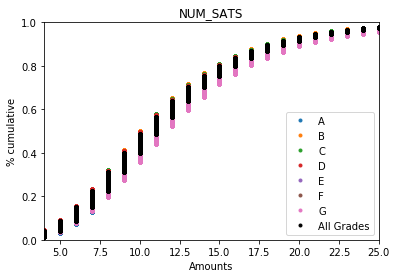

          All loans              A              B              C  \
count  2.395958e+06  405168.000000  697098.000000  689100.000000   
mean   1.165207e+01      12.083146      11.474717      11.512135   
std    5.465617e+00       5.504806       5.345693       5.438399   
min    0.000000e+00       1.000000       1.000000       0.000000   
25%    8.000000e+00       8.000000       8.000000       8.000000   
50%    1.100000e+01      11.000000      11.000000      11.000000   
75%    1.400000e+01      15.000000      14.000000      14.000000   
max    9.000000e+01      80.000000      82.000000      90.000000   

                   D              E             F             G  
count  359724.000000  169910.000000  58486.000000  16472.000000  
mean       11.583709      11.863363     12.038676     12.349563  
std         5.525187       5.610992      5.746827      6.015892  
min         0.000000       0.000000      1.000000      1.000000  
25%         8.000000       8.000000      8.000000      8.

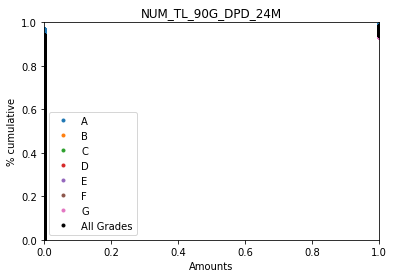

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   8.935314e-02       0.046210       0.091606       0.100599   
std    5.035921e-01       0.340922       0.500890       0.543878   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       0.000000   
max    3.900000e+01      20.000000      24.000000      30.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        0.105374       0.099211      0.095407      0.109668  
std         0.558431       0.532085      0.496935      0.602961  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

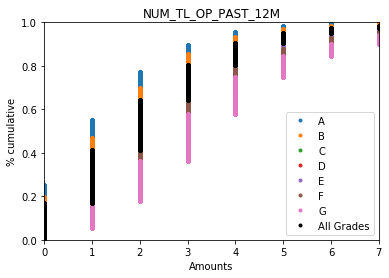

          All loans              A              B              C  \
count  2.372586e+06  400818.000000  689040.000000  683702.000000   
mean   2.177679e+00       1.610616       1.913520       2.296091   
std    1.839439e+00       1.491736       1.635356       1.845724   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    1.000000e+00       0.000000       1.000000       1.000000   
50%    2.000000e+00       1.000000       2.000000       2.000000   
75%    3.000000e+00       2.000000       3.000000       3.000000   
max    3.200000e+01      20.000000      26.000000      32.000000   

                   D              E             F             G  
count  356274.000000  168510.000000  57920.000000  16322.000000  
mean        2.582782       2.819061      3.115504      3.502267  
std         1.994766       2.124595      2.266706      2.401116  
min         0.000000       0.000000      0.000000      0.000000  
25%         1.000000       1.000000      2.000000      2.

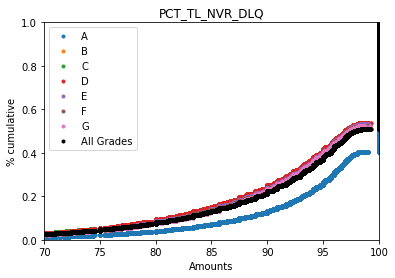

          All loans              A              B              C  \
count  2.372278e+06  400786.000000  688916.000000  683616.000000   
mean   9.417116e+01      96.189850      93.941616      93.616759   
std    8.709222e+00       6.831336       8.866668       9.149162   
min    0.000000e+00      10.500000      10.000000       0.000000   
25%    9.130000e+01      94.700000      90.900000      90.500000   
50%    9.790000e+01     100.000000      97.300000      97.000000   
75%    1.000000e+02     100.000000     100.000000     100.000000   
max    1.000000e+02     100.000000     100.000000     100.000000   

                   D              E             F             G  
count  356236.000000  168488.000000  57916.000000  16320.000000  
mean       93.567365      93.890164     94.036004     94.069559  
std         9.125733       8.703073      8.535102      8.499173  
min         0.000000      14.300000     23.500000     30.000000  
25%        90.000000      90.900000     90.900000     90.

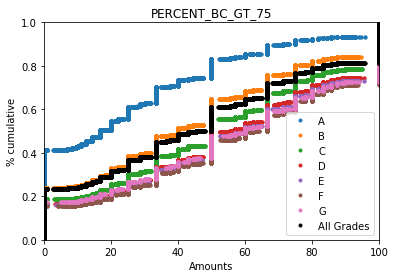

          All loans              A              B              C  \
count  2.386984e+06  407286.000000  696960.000000  684580.000000   
mean   4.572829e+01      26.373987      43.330426      50.835676   
std    3.593945e+01      30.334791      34.843601      35.496658   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    1.250000e+01       0.000000      11.100000      20.000000   
50%    5.000000e+01      16.700000      40.000000      50.000000   
75%    7.500000e+01      50.000000      66.700000      80.000000   
max    1.000000e+02     100.000000     100.000000     100.000000   

                   D              E             F             G  
count  356108.000000  168076.000000  57802.000000  16172.000000  
mean       55.178549      56.511528     58.037534     56.136211  
std        35.650623      35.723903     35.942407     36.509551  
min         0.000000       0.000000      0.000000      0.000000  
25%        25.000000      25.000000     28.600000     25.

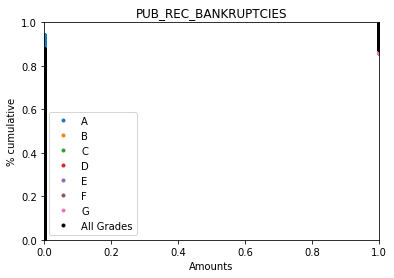

          All loans              A              B              C  \
count  2.506246e+06  433830.000000  731490.000000  711168.000000   
mean   1.340387e-01       0.062559       0.140251       0.153964   
std    3.783036e-01       0.258468       0.383303       0.402462   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       0.000000   
max    1.200000e+01       8.000000      12.000000       9.000000   

                   D              E             F            G  
count  373828.000000  177396.000000  61284.000000  17250.00000  
mean        0.153894       0.153442      0.150969      0.15687  
std         0.404879       0.410242      0.404179      0.42513  
min         0.000000       0.000000      0.000000      0.00000  
25%         0.000000       0.000000      0.000000      0.00000

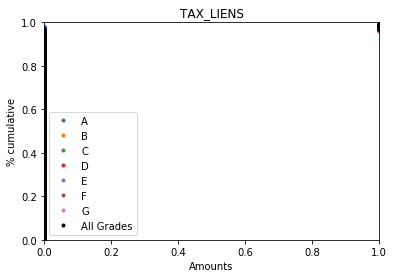

          All loans              A              B              C  \
count  2.507562e+06  434080.000000  731888.000000  711518.000000   
mean   5.229302e-02       0.033934       0.051787       0.058644   
std    3.989664e-01       0.308373       0.406454       0.432983   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.000000       0.000000   
50%    0.000000e+00       0.000000       0.000000       0.000000   
75%    0.000000e+00       0.000000       0.000000       0.000000   
max    8.500000e+01      24.000000      63.000000      85.000000   

                   D              E             F             G  
count  374048.000000  177462.000000  61312.000000  17254.000000  
mean        0.059110       0.055708      0.060021      0.063406  
std         0.401493       0.399221      0.447814      0.379489  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000      0.000000      0.

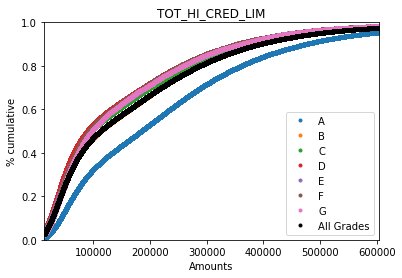

          All loans             A             B             C             D  \
count  2.372586e+06  4.008180e+05  6.890400e+05  6.837020e+05  3.562740e+05   
mean   1.739312e+05  2.301972e+05  1.735781e+05  1.599698e+05  1.510929e+05   
std    1.771815e+05  2.071008e+05  1.740979e+05  1.682459e+05  1.596844e+05   
min    0.000000e+00  1.600000e+03  5.000000e+02  0.000000e+00  0.000000e+00   
25%    4.955000e+04  7.716000e+04  4.930000e+04  4.487025e+04  4.273200e+04   
50%    1.123000e+05  1.847170e+05  1.127215e+05  9.736600e+04  8.916400e+04   
75%    2.515330e+05  3.223920e+05  2.510820e+05  2.316560e+05  2.184030e+05   
max    9.999999e+06  9.999999e+06  5.915440e+06  9.999999e+06  9.999999e+06   

                  E             F             G  
count  1.685100e+05  5.792000e+04  1.632200e+04  
mean   1.554117e+05  1.528805e+05  1.563425e+05  
std    1.637769e+05  1.546862e+05  1.539206e+05  
min    0.000000e+00  2.000000e+02  5.000000e+02  
25%    4.597925e+04  4.708625e+04  4.9

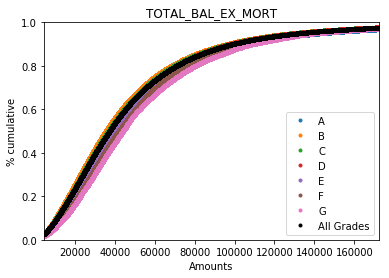

          All loans             A             B             C             D  \
count  2.413078e+06  4.095880e+05  7.029860e+05  6.925560e+05  3.616620e+05   
mean   4.957939e+04  5.229386e+04  4.778489e+04  4.874125e+04  4.945195e+04   
std    4.754079e+04  5.218362e+04  4.650197e+04  4.605287e+04  4.629630e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.094800e+04  2.162300e+04  1.975600e+04  2.066400e+04  2.129825e+04   
50%    3.729700e+04  3.850800e+04  3.552000e+04  3.677800e+04  3.775100e+04   
75%    6.240800e+04  6.512000e+04  6.001000e+04  6.160700e+04  6.265875e+04   
max    3.408095e+06  2.688920e+06  1.924200e+06  1.896461e+06  2.921551e+06   

                  E              F              G  
count  1.708820e+05   58878.000000   16526.000000  
mean   5.223588e+04   53114.606644   56486.862883  
std    4.859980e+04   45435.278592   49629.063984  
min    0.000000e+00       0.000000       0.000000  
25%    2.350000e+04   24859.

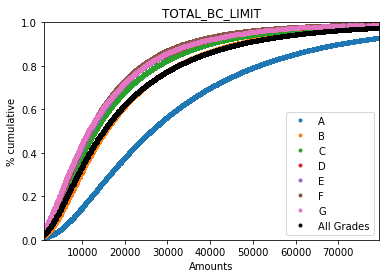

          All loans              A              B              C  \
count  2.413078e+06  409588.000000  702986.000000  692556.000000   
mean   2.147833e+04   33976.471352   21574.045642   18387.510174   
std    2.138888e+04   28522.591710   20447.572674   18048.937735   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    7.700000e+03   14300.000000    8300.000000    6800.000000   
50%    1.500000e+04   26100.000000   15500.000000   13000.000000   
75%    2.790000e+04   45100.000000   27900.000000   23900.000000   
max    1.105500e+06  760000.000000  474600.000000  571500.000000   

                  D              E              F              G  
count  3.616620e+05  170882.000000   58878.000000   16526.000000  
mean   1.649948e+04   16564.200489   16017.131628   16402.632337  
std    1.670586e+04   16294.329881   15718.412797   16453.275724  
min    0.000000e+00       0.000000       0.000000       0.000000  
25%    5.900000e+03    6100.000000    6000.000000   

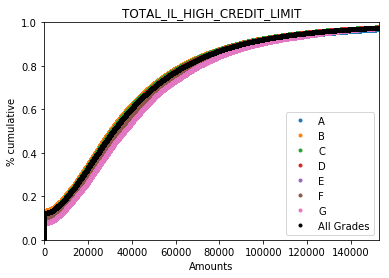

          All loans             A             B             C             D  \
count  2.372586e+06  4.008180e+05  6.890400e+05  6.837020e+05  3.562740e+05   
mean   4.195803e+04  4.491782e+04  4.052894e+04  4.100619e+04  4.172907e+04   
std    4.306059e+04  4.672545e+04  4.250952e+04  4.171285e+04  4.211870e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.468900e+04  1.563100e+04  1.356900e+04  1.427800e+04  1.478100e+04   
50%    3.157300e+04  3.355800e+04  3.016000e+04  3.090600e+04  3.165600e+04   
75%    5.638500e+04  5.998700e+04  5.454600e+04  5.525175e+04  5.609800e+04   
max    2.101913e+06  2.101913e+06  2.000000e+06  1.183946e+06  1.214546e+06   

                  E              F              G  
count  1.685100e+05   57920.000000   16322.000000  
mean   4.370602e+04   44575.674862   47137.501409  
std    4.334218e+04   42062.584463   43923.128013  
min    0.000000e+00       0.000000       0.000000  
25%    1.620000e+04   17331.

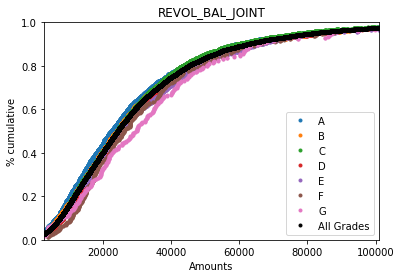

           All loans              A              B              C  \
count   23510.000000    3404.000000    5708.000000    7494.000000   
mean    31181.272140   29288.121034   31141.892782   30472.101148   
std     26484.346638   24966.576248   26888.416597   25937.811452   
min         0.000000       0.000000       0.000000       0.000000   
25%     13672.000000   12164.000000   13594.000000   13423.750000   
50%     24385.000000   22594.500000   24179.000000   24244.000000   
75%     40338.000000   38610.000000   39772.000000   39068.000000   
max    290237.000000  205294.000000  266416.000000  290237.000000   

                   D              E              F              G  
count    4098.000000    1792.000000     644.000000     370.000000  
mean    32728.037091   32890.674107   33148.829193   34734.227027  
std     27765.717180   27918.147518   23892.230933   25590.794714  
min         0.000000      82.000000     538.000000       0.000000  
25%     14757.000000   14100.000000   

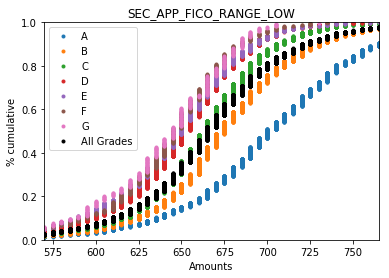

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean     666.704806   701.445358   675.453749   662.221777   649.272816   
std       45.242020    51.268909    43.553348    38.525224    37.309546   
min      540.000000   540.000000   540.000000   540.000000   540.000000   
25%      640.000000   670.000000   650.000000   640.000000   630.000000   
50%      665.000000   700.000000   675.000000   665.000000   650.000000   
75%      690.000000   735.000000   700.000000   685.000000   675.000000   
max      830.000000   830.000000   830.000000   815.000000   770.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean    645.485491  642.857143  640.270270  
std      39.436480   36.391317   37.357606  
min     540.000000  540.000000  540.000000  
25%     625.000000  620.000000  620.000000  
50%     650.000000  645.000000  645.000000  
75%     6

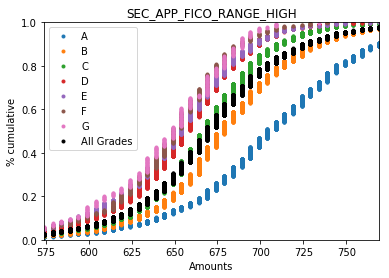

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean     670.704806   705.445358   679.453749   666.221777   653.272816   
std       45.242020    51.268909    43.553348    38.525224    37.309546   
min      544.000000   544.000000   544.000000   544.000000   544.000000   
25%      644.000000   674.000000   654.000000   644.000000   634.000000   
50%      669.000000   704.000000   679.000000   669.000000   654.000000   
75%      694.000000   739.000000   704.000000   689.000000   679.000000   
max      834.000000   834.000000   834.000000   819.000000   774.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean    649.485491  646.857143  644.270270  
std      39.436480   36.391317   37.357606  
min     544.000000  544.000000  544.000000  
25%     629.000000  624.000000  624.000000  
50%     654.000000  649.000000  649.000000  
75%     6

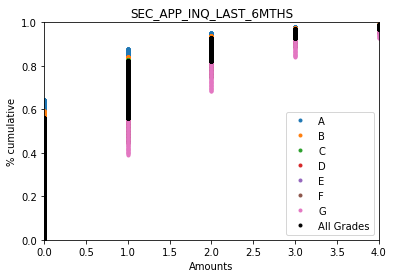

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean       0.735262     0.554054     0.666433     0.736322     0.830649   
std        1.074143     0.934067     1.015466     1.068767     1.148533   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        1.000000     1.000000     1.000000     1.000000     1.000000   
max        6.000000     6.000000     6.000000     6.000000     6.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean      0.883929    0.990683    1.221622  
std       1.140067    1.189603    1.400568  
min       0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000  
50%       1.000000    1.000000    1.000000  
75%      

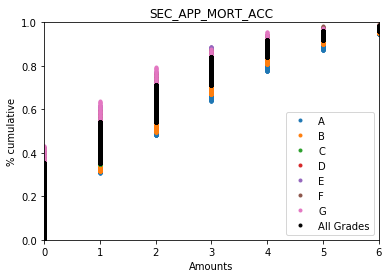

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean       1.713228     2.047591     1.902593     1.645316     1.504148   
std        1.839451     2.070055     1.914862     1.751979     1.726223   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        1.000000     2.000000     2.000000     1.000000     1.000000   
75%        3.000000     3.000000     3.000000     3.000000     2.000000   
max       17.000000    15.000000    17.000000    14.000000    15.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean      1.416295    1.425466    1.345946  
std       1.681416    1.640005    1.626107  
min       0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000  
50%       1.000000    1.000000    1.000000  
75%      

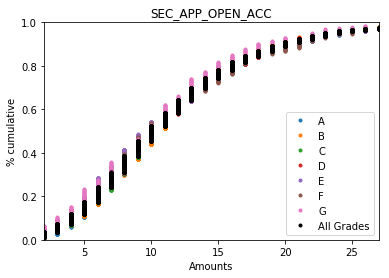

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean      11.307529    11.415981    11.336020    11.307713    11.309419   
std        6.493083     6.467509     6.359885     6.427416     6.704831   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        7.000000     7.000000     7.000000     7.000000     6.000000   
50%       10.000000    10.000000    10.000000    10.000000    10.000000   
75%       15.000000    15.000000    15.000000    15.000000    15.000000   
max       58.000000    41.000000    58.000000    48.000000    46.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean     11.117188   11.416149   10.578378  
std       6.772089    6.670712    5.974251  
min       0.000000    1.000000    1.000000  
25%       6.000000    7.000000    6.000000  
50%      10.000000   10.000000   10.000000  
75%      

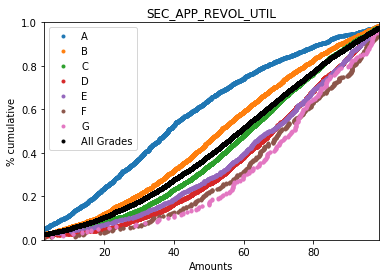

          All loans            A            B            C            D  \
count  23126.000000  3370.000000  5640.000000  7378.000000  4004.000000   
mean      56.965761    42.079347    53.022872    59.181458    65.005994   
std       26.394349    26.820257    25.814762    24.858983    24.224120   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%       37.800000    21.100000    34.100000    42.100000    49.300000   
50%       58.900000    38.300000    53.300000    61.400000    68.200000   
75%       78.200000    60.600000    72.700000    78.700000    83.800000   
max      163.900000   163.900000   148.000000   162.700000   158.700000   

                 E           F           G  
count  1746.000000  632.000000  356.000000  
mean     63.823940   68.779430   69.392697  
std      25.576275   23.291487   22.682564  
min       0.000000    0.000000    0.000000  
25%      47.100000   54.150000   57.000000  
50%      67.800000   70.550000   74.300000  
75%      

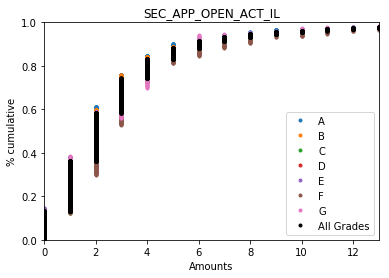

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean       2.916376     2.772620     2.852838     2.963971     2.995608   
std        3.237409     3.190034     3.246445     3.206082     3.260473   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        1.000000     1.000000     1.000000     1.000000     1.000000   
50%        2.000000     2.000000     2.000000     2.000000     2.000000   
75%        4.000000     3.000000     3.000000     4.000000     4.000000   
max       35.000000    35.000000    33.000000    32.000000    27.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean      2.887277    3.273292    2.897297  
std       3.303318    3.462283    3.110476  
min       0.000000    0.000000    0.000000  
25%       1.000000    1.000000    1.000000  
50%       2.000000    2.000000    2.000000  
75%      

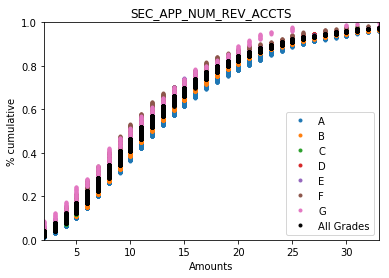

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean      12.848915    13.852526    13.287316    12.636776    12.443631   
std        8.352366     8.878253     8.645834     8.058982     8.233466   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        7.000000     7.000000     7.000000     7.000000     7.000000   
50%       11.000000    12.000000    11.000000    11.000000    11.000000   
75%       17.000000    18.000000    17.000000    17.000000    16.000000   
max       90.000000    90.000000    75.000000    64.000000    84.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean     12.116071   11.698758   11.189189  
std       8.046343    7.755153    6.948661  
min       0.000000    0.000000    0.000000  
25%       6.000000    6.000000    6.000000  
50%      10.000000   10.000000   10.000000  
75%      

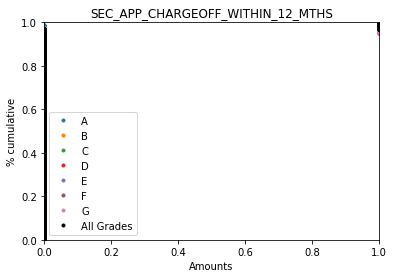

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean       0.049851     0.023502     0.034338     0.046437     0.074671   
std        0.429345     0.271108     0.275534     0.339538     0.641718   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     0.000000     0.000000   
max       20.000000     8.000000     7.000000    10.000000    20.000000   

                E           F           G  
count  1792.00000  644.000000  370.000000  
mean      0.08817    0.077640    0.091892  
std       0.57690    0.802521    0.462337  
min       0.00000    0.000000    0.000000  
25%       0.00000    0.000000    0.000000  
50%       0.00000    0.000000    0.000000  
75%       0.0000

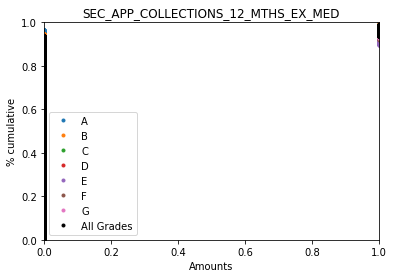

          All loans            A            B            C            D  \
count  23510.000000  3404.000000  5708.000000  7494.000000  4098.000000   
mean       0.082178     0.042303     0.064121     0.084601     0.107369   
std        0.387895     0.268816     0.297920     0.372619     0.513607   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     0.000000     0.000000   
max       11.000000     7.000000     5.000000     6.000000    11.000000   

                 E           F           G  
count  1792.000000  644.000000  370.000000  
mean      0.137277    0.096273    0.108108  
std       0.530599    0.343867    0.428256  
min       0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000  
50%       0.000000    0.000000    0.000000  
75%      

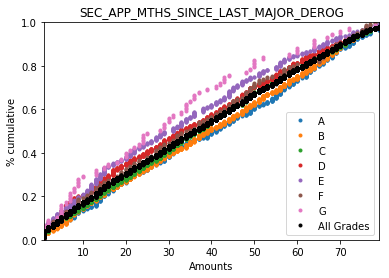

         All loans           A            B            C            D  \
count  8338.000000  916.000000  1882.000000  2752.000000  1610.000000   
mean     37.139842   40.133188    39.407014    37.659884    35.007453   
std      23.895275   24.038170    23.885762    23.715857    24.185166   
min       0.000000    1.000000     0.000000     0.000000     0.000000   
25%      16.000000   18.000000    18.000000    17.000000    14.000000   
50%      36.000000   41.000000    39.000000    37.000000    33.000000   
75%      57.000000   62.000000    60.000000    57.000000    55.000000   
max     125.000000   96.000000   111.000000   115.000000   125.000000   

                E           F          G  
count  728.000000  300.000000  150.00000  
mean    32.376374   35.740000   29.68000  
std     22.871415   23.489393   22.18359  
min      0.000000    0.000000    0.00000  
25%     12.000000   14.000000    9.00000  
50%     31.000000   34.500000   28.00000  
75%     50.250000   54.000000   43.75000 

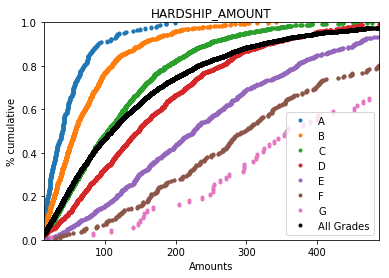

          All loans           A            B            C            D  \
count  10028.000000  510.000000  2148.000000  3424.000000  2116.000000   
mean     147.370377   48.763765    74.147402   123.338096   169.037439   
std      128.257327   36.972249    57.202348    87.393601   112.716026   
min        0.640000    4.770000     1.470000     0.640000     2.150000   
25%       53.470000   22.515000    32.970000    55.980000    79.260000   
50%      110.005000   39.870000    58.280000   103.690000   147.420000   
75%      203.350000   63.045000    96.420000   168.630000   233.950000   
max      943.940000  199.030000   341.590000   516.220000   610.360000   

                 E           F           G  
count  1204.000000  494.000000  132.000000  
mean    247.111811  329.000567  406.441212  
std     145.242824  185.050284  202.417001  
min      11.950000   29.560000   24.070000  
25%     134.880000  184.067500  254.460000  
50%     225.285000  298.530000  357.110000  
75%     344.240000

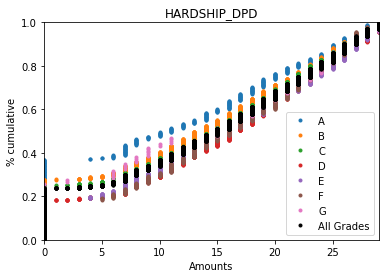

          All loans           A            B            C            D  \
count  10028.000000  510.000000  2148.000000  3424.000000  2116.000000   
mean      13.885919   11.172549    12.947858    13.639019    15.127599   
std        9.816231   10.141321     9.924591     9.827579     9.517523   
min        0.000000    0.000000     0.000000     0.000000     0.000000   
25%        5.000000    0.000000     0.000000     1.750000     8.000000   
50%       15.000000   11.000000    14.000000    15.000000    16.000000   
75%       23.000000   20.000000    22.000000    22.000000    23.000000   
max       37.000000   29.000000    32.000000    30.000000    32.000000   

                 E           F           G  
count  1204.000000  494.000000  132.000000  
mean     14.850498   14.935223   13.409091  
std       9.691376    9.290219   10.275558  
min       0.000000    0.000000    0.000000  
25%       7.000000    8.000000    0.000000  
50%      16.000000   16.000000   15.000000  
75%      23.000000

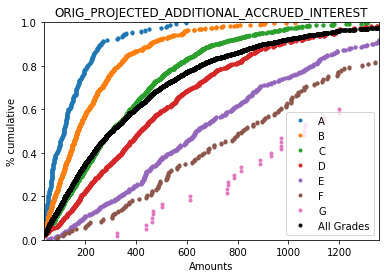

         All loans           A            B            C            D  \
count  6464.000000  400.000000  1448.000000  2218.000000  1344.000000   
mean    413.094124  142.453200   220.497845   362.885248   488.494643   
std     360.378648  111.395233   174.162948   261.600358   333.282603   
min       1.920000   14.310000     4.410000     1.920000     6.450000   
25%     147.892500   64.132500    96.600000   159.990000   219.525000   
50%     305.775000  115.485000   170.310000   303.000000   416.250000   
75%     569.587500  186.502500   290.355000   502.470000   685.702500   
max    2343.150000  597.090000  1024.770000  1432.200000  1594.230000   

                 E            F            G  
count   720.000000   274.000000    60.000000  
mean    714.033833   895.273358  1219.212000  
std     421.368549   530.068898   598.315718  
min      54.150000    88.680000   327.000000  
25%     402.195000   489.690000   763.380000  
50%     639.165000   820.590000  1063.470000  
75%    1008.5

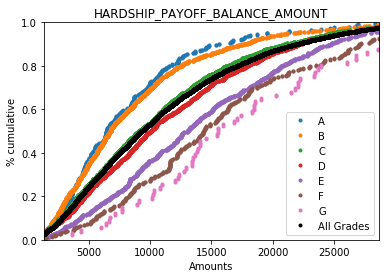

          All loans             A             B             C             D  \
count  10028.000000    510.000000   2148.000000   3424.000000   2116.000000   
mean   10982.148993   8095.295020   8545.744469  10663.248470  11521.533157   
std     7430.650925   5717.693244   6397.741569   7230.503728   7383.488622   
min       55.730000    612.630000    174.150000     55.730000    191.120000   
25%     5075.960000   3995.437500   4026.590000   4944.142500   5459.660000   
50%     9320.405000   6461.710000   6785.215000   9113.180000  10076.500000   
75%    15284.330000  10633.100000  11090.650000  14676.455000  16151.890000   
max    39542.450000  30044.500000  38390.380000  39542.450000  37657.180000   

                  E             F             G  
count   1204.000000    494.000000    132.000000  
mean   13970.123854  15523.028057  17160.595606  
std     7631.264526   8070.645185   8173.739717  
min      767.760000   1386.850000   1139.240000  
25%     8196.290000   9049.410000  109

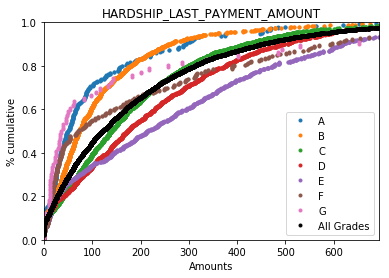

          All loans           A            B            C            D  \
count  10028.000000  510.000000  2148.000000  3424.000000  2116.000000   
mean     184.276039  103.726196   115.515708   183.504171   220.420643   
std      195.456440  137.128681   136.444123   173.187485   197.514112   
min        0.010000    0.010000     0.010000     0.010000     0.010000   
25%       39.360000   21.647500    32.650000    55.117500    62.870000   
50%      121.960000   49.580000    72.700000   139.200000   172.965000   
75%      267.080000  127.122500   154.260000   261.755000   330.120000   
max     1407.860000  782.860000  1162.260000  1223.330000  1247.480000   

                 E            F            G  
count  1204.000000   494.000000   132.000000  
mean    270.394535   210.292146   172.153939  
std     247.188101   280.370850   284.039681  
min       0.040000     0.020000     0.350000  
25%      43.690000    20.052500    13.060000  
50%     214.805000    70.380000    37.410000  
75% 

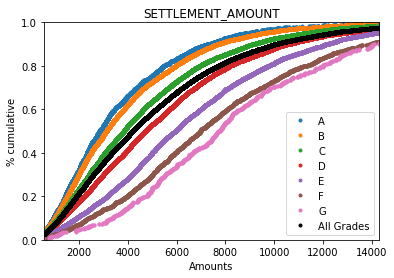

          All loans             A             B             C             D  \
count  61484.000000   4004.000000  13006.000000  18982.000000  13372.000000   
mean    5045.485081   3618.066084   3880.140543   4604.062895   5468.386521   
std     3662.768623   2741.851076   2887.654462   3331.477171   3766.070844   
min       44.210000    107.000000     44.210000     82.960000     60.840000   
25%     2250.970000   1636.000000   1762.135000   2102.207500   2611.380000   
50%     4203.230000   2847.315000   3123.280000   3846.000000   4724.865000   
75%     6906.000000   4965.000000   5312.812500   6278.750000   7422.000000   
max    33601.000000  22288.000000  21860.000000  24942.920000  33601.000000   

                  E             F             G  
count   8188.000000   3014.000000    918.000000  
mean    6598.136910   7657.173796   8325.606688  
std     3987.291343   4315.262830   4387.093993  
min      219.000000    278.640000    457.570000  
25%     3662.580000   4515.840000   51

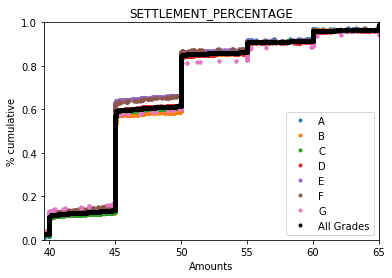

          All loans            A             B             C             D  \
count  61484.000000  4004.000000  13006.000000  18982.000000  13372.000000   
mean      47.600147    47.702023     47.825361     47.676223     47.622321   
std        7.321847     6.312075      7.000416      6.495842      9.111336   
min        0.200000    20.000000      0.650000     18.610000      0.550000   
25%       45.000000    45.000000     45.000000     45.000000     45.000000   
50%       45.000000    45.010000     45.010000     45.000000     45.000000   
75%       50.000000    50.000000     50.000000     50.000000     50.000000   
max      521.350000    90.020000    184.360000    100.000000    521.350000   

                 E            F           G  
count  8188.000000  3014.000000  918.000000  
mean     47.124553    47.021838   48.209673  
std       6.931515     6.674049    7.866626  
min       0.200000    20.000000   25.860000  
25%      45.000000    45.000000   45.000000  
50%      45.000000   

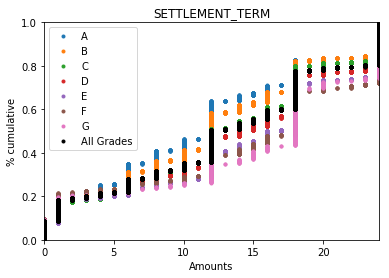

          All loans            A             B             C             D  \
count  61484.000000  4004.000000  13006.000000  18982.000000  13372.000000   
mean      12.972741    11.263736     11.911733     12.847224     13.448998   
std        8.321026     7.990525      8.052150      8.012690      8.688719   
min        0.000000     0.000000      0.000000      0.000000      0.000000   
25%        6.000000     4.000000      6.000000      6.000000      6.000000   
50%       12.000000    12.000000     12.000000     12.000000     14.000000   
75%       18.000000    18.000000     18.000000     18.000000     18.000000   
max      181.000000    36.000000    118.000000     65.000000    181.000000   

                 E            F           G  
count  8188.000000  3014.000000  918.000000  
mean     14.292868    14.377571   14.729847  
std       8.377642     8.865636    8.486631  
min       0.000000     0.000000    0.000000  
25%       8.000000     6.000000    9.250000  
50%      17.000000   

In [9]:
for thing in numeric:
    numeric_graph(thing)